**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje No Supervisado**

*Edición 2022*

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
pd.options.display.max_columns = None

In [4]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
sns.set(style="dark")

In [5]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [6]:
url='https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/players_22.csv'

In [7]:
df=pd.read_csv(url)

## 1- Análisis exploratorio de la base

**A. Nos quedamos con las variables de interés**

Aquellas que dejamos de lado:
- sofifa_id, player_url, long_name: Consideramos short_name como mejor 
identificador
- club_name, nationality_name: Consideramos quedarnos con los id respectivos
- club_jersey_number, club_loaned_from, club_joined, club_contract_valid_until, nation_jersey_number, body_type, real_face, player_tags, player_traits, player_face_url,	club_logo_url,	club_flag_url,	nation_logo_url,	nation_flag_url: Consideramos que no responden a caracteristicas especificas que describan la habilidad del jugador.
- ls	st	rs	lw	lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb	rcb	rb	gk: La variable 'overall' es el promedio del puntaje que tiene cada jugador en la posicion en la que juega, por eso consideramos excluir estas.

In [8]:
col_interest=['short_name','player_positions','overall','potential','value_eur','wage_eur','age','height_cm','weight_kg',
              'club_team_id','league_name','league_level','club_position','nationality_id','nation_team_id','nation_position',
              'preferred_foot','weak_foot','skill_moves','international_reputation','work_rate','release_clause_eur','pace','shooting',
              'passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
              'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_long_passing','skill_fk_accuracy',
              'skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
              'movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
              'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
              'defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle']

In [9]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential     value_eur   wage_eur  age         dob  height_cm  \
0       93         93  78000000.000 320000.000   34  1987-06-24        170   
1       92         92 119500000.000 270000.000   32  1988-08-21        185   
2       91         91  45000000.000 270000.000   36  1985-02-05        187   
3       91         91 129000000.000 270000.000   29  1992-02-05        175   
4       91         91 125500000.000 350000.000   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72        73.000  Paris Saint-Germain          French Ligue 1   
1         81        21.000    FC Bayern München    German 1. Bundesliga   
2         83        11.000    Manchester United  English Premier League   
3         68        73.000  Paris Saint-Germain          French Ligue 1   
4         70        10.000      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0         1.000            RW              30.000              NaN   
1         1.000            ST               9.000              NaN   
2         1.000            ST               7.000              NaN   
3         1.000            LW              10.000              NaN   
4         1.000           RCM              17.000              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                   2023.000              52        Argentina   
1  2014-07-01                   2023.000              37           Poland   
2  2021-08-27                   2023.000              38         Portugal   
3  2017-08-03                   2025.000              54           Brazil   
4  2015-08-30                   2025.000               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0        1369.000              RW                10.000           Left   
1        1353.000              RS                 9.000          Right   
2        1354.000              ST                 7.000          Right   
3             NaN             NaN                   NaN          Right   
4        1325.000             RCM                 7.000          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes       144300000.000   
1       Yes       197200000.000   
2       Yes        83300000.000   
3       Yes       238700000.000   
4       Yes       232200000.000   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Dis

**B. Eliminamos los registros referentes a los arqueros**

Según pudimos ver, los arqueros se diferencian en la mayoría de las variables (referentes a las habilidades) respecto del resto de los jugadores. Por lo cúal para este análisis en particular los dejamos de lado.

In [10]:
df = df[df['player_positions']!='GK']

In [11]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential     value_eur   wage_eur  age         dob  height_cm  \
0       93         93  78000000.000 320000.000   34  1987-06-24        170   
1       92         92 119500000.000 270000.000   32  1988-08-21        185   
2       91         91  45000000.000 270000.000   36  1985-02-05        187   
3       91         91 129000000.000 270000.000   29  1992-02-05        175   
4       91         91 125500000.000 350000.000   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72        73.000  Paris Saint-Germain          French Ligue 1   
1         81        21.000    FC Bayern München    German 1. Bundesliga   
2         83        11.000    Manchester United  English Premier League   
3         68        73.000  Paris Saint-Germain          French Ligue 1   
4         70        10.000      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0         1.000            RW              30.000              NaN   
1         1.000            ST               9.000              NaN   
2         1.000            ST               7.000              NaN   
3         1.000            LW              10.000              NaN   
4         1.000           RCM              17.000              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                   2023.000              52        Argentina   
1  2014-07-01                   2023.000              37           Poland   
2  2021-08-27                   2023.000              38         Portugal   
3  2017-08-03                   2025.000              54           Brazil   
4  2015-08-30                   2025.000               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0        1369.000              RW                10.000           Left   
1        1353.000              RS                 9.000          Right   
2        1354.000              ST                 7.000          Right   
3             NaN             NaN                   NaN          Right   
4        1325.000             RCM                 7.000          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes       144300000.000   
1       Yes       197200000.000   
2       Yes        83300000.000   
3       Yes       238700000.000   
4       Yes       232200000.000   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Dis

In [12]:
df = df[col_interest]

In [13]:
df.head()

short_name player_positions  overall  potential     value_eur  \
0           L. Messi       RW, ST, CF       93         93  78000000.000   
1     R. Lewandowski               ST       92         92 119500000.000   
2  Cristiano Ronaldo           ST, LW       91         91  45000000.000   
3          Neymar Jr          LW, CAM       91         91 129000000.000   
4       K. De Bruyne          CM, CAM       91         91 125500000.000   

    wage_eur  age  height_cm  weight_kg  club_team_id             league_name  \
0 320000.000   34        170         72        73.000          French Ligue 1   
1 270000.000   32        185         81        21.000    German 1. Bundesliga   
2 270000.000   36        187         83        11.000  English Premier League   
3 270000.000   29        175         68        73.000          French Ligue 1   
4 350000.000   30        181         70        10.000  English Premier League   

   league_level club_position  nationality_id  nation_team_id nation_position  \
0         1.000            RW              52        1369.000              RW   
1         1.000            ST              37        1353.000              RS   
2         1.000            ST              38        1354.000              ST   
3         1.000            LW              54             NaN             NaN   
4         1.000           RCM               7        1325.000             RCM   

  preferred_foot  weak_foot  skill_moves  international_reputation  \
0           Left          4            4                         5   
1          Right          4            4                         5   
2          Right          4            5                         5   
3          Right          5            5                         5   
4          Right          5            4                         4   

     work_rate  release_clause_eur   pace  shooting  passing  dribbling  \
0   Medium/Low       144300000.000 85.000    92.000   91.000     95.000   
1  High/Medium       197200000.000 78.000    92.000   79.000     86.000   
2     High/Low        83300000.000 87.000    94.000   80.000     88.000   
3  High/Medium       238700000.000 91.000    83.000   86.000     94.000   
4    High/High       232200000.000 76.000    86.000   93.000     88.000   

   defending  physic  attacking_crossing  attacking_finishing  \
0     34.000  65.000                  85                   95   
1     44.000  82.000                  71                   95   
2     34.000  75.000                  87                   95   
3     37.000  63.000                  85                   83   
4     64.000  78.000                  94                   82   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   
2                          90                       80                 86   
3                          63                       86                 86   
4                          55                       94                 82   

   skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0               96           93                  91                 94   
1               85           79                  70                 85   
2               88           81                  77                 84   
3               95           88                  81                 87   
4               88           85                  93                 83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   
2                  88                     85                     88   
3                  95                     93                     89   
4                  91                     76               

**C. Conversión de variables**

A la variable 'position player', como vimos en clase le asignamos todas las posiciones posibles en 4 grupos que las resumen mejor.
Para aquellos que tenían más de una posición, teniendo en cuenta que era un orden por preferencia, se tomó en cuenta la primera.

In [14]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position.split(',',1)[0] in forwards:
        return 'Forward'
    
    elif position.split(',',1)[0] in midfielders:
        return 'Midfielder'
    
    elif position.split(',',1)[0] in defenders:
        return 'Defender'
    
    elif position.split(',',1)[0] in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [15]:
df["Position2"]=df["player_positions"].apply(lambda x: pos2(x))

df["Position2"].value_counts()

Defender      6394
Forward       5582
Midfielder    5131
Name: Position2, dtype: int64

A la variable 'work rate' la separamos considerando (según pudimos ver en información obtenida sobre este data set) que se refiere a la velocidad que implementa para los roles de ataque y defensa respectivamente

In [16]:
df['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/High', 'Medium/Medium', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

In [17]:
df['Attacking_WR'] = (np.where(df['work_rate'].str.contains('/'),
                  df['work_rate'].str.split('/').str[0],
                  df['work_rate']))

In [18]:
df['Defending_WR'] = (np.where(df['work_rate'].str.contains('/'),
                  df['work_rate'].str.split('/').str[1],
                  df['work_rate']))

In [19]:
df.head()

short_name player_positions  overall  potential     value_eur  \
0           L. Messi       RW, ST, CF       93         93  78000000.000   
1     R. Lewandowski               ST       92         92 119500000.000   
2  Cristiano Ronaldo           ST, LW       91         91  45000000.000   
3          Neymar Jr          LW, CAM       91         91 129000000.000   
4       K. De Bruyne          CM, CAM       91         91 125500000.000   

    wage_eur  age  height_cm  weight_kg  club_team_id             league_name  \
0 320000.000   34        170         72        73.000          French Ligue 1   
1 270000.000   32        185         81        21.000    German 1. Bundesliga   
2 270000.000   36        187         83        11.000  English Premier League   
3 270000.000   29        175         68        73.000          French Ligue 1   
4 350000.000   30        181         70        10.000  English Premier League   

   league_level club_position  nationality_id  nation_team_id nation_position  \
0         1.000            RW              52        1369.000              RW   
1         1.000            ST              37        1353.000              RS   
2         1.000            ST              38        1354.000              ST   
3         1.000            LW              54             NaN             NaN   
4         1.000           RCM               7        1325.000             RCM   

  preferred_foot  weak_foot  skill_moves  international_reputation  \
0           Left          4            4                         5   
1          Right          4            4                         5   
2          Right          4            5                         5   
3          Right          5            5                         5   
4          Right          5            4                         4   

     work_rate  release_clause_eur   pace  shooting  passing  dribbling  \
0   Medium/Low       144300000.000 85.000    92.000   91.000     95.000   
1  High/Medium       197200000.000 78.000    92.000   79.000     86.000   
2     High/Low        83300000.000 87.000    94.000   80.000     88.000   
3  High/Medium       238700000.000 91.000    83.000   86.000     94.000   
4    High/High       232200000.000 76.000    86.000   93.000     88.000   

   defending  physic  attacking_crossing  attacking_finishing  \
0     34.000  65.000                  85                   95   
1     44.000  82.000                  71                   95   
2     34.000  75.000                  87                   95   
3     37.000  63.000                  85                   83   
4     64.000  78.000                  94                   82   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   
2                          90                       80                 86   
3                          63                       86                 86   
4                          55                       94                 82   

   skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0               96           93                  91                 94   
1               85           79                  70                 85   
2               88           81                  77                 84   
3               95           88                  81                 87   
4               88           85                  93                 83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   
2                  88                     85                     88   
3                  95                     93                     89   
4                  91                     76               

In [20]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'league_name', 'league_level', 'club_position', 'nationality_id',
       'nation_team_id', 'nation_position', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_long_passing', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mental

In [21]:
# Eliminamos columnas preprocesadas anteriormente
df = df.drop(['player_positions', 'work_rate'], axis=1)
df.head()

short_name  overall  potential     value_eur   wage_eur  age  \
0           L. Messi       93         93  78000000.000 320000.000   34   
1     R. Lewandowski       92         92 119500000.000 270000.000   32   
2  Cristiano Ronaldo       91         91  45000000.000 270000.000   36   
3          Neymar Jr       91         91 129000000.000 270000.000   29   
4       K. De Bruyne       91         91 125500000.000 350000.000   30   

   height_cm  weight_kg  club_team_id             league_name  league_level  \
0        170         72        73.000          French Ligue 1         1.000   
1        185         81        21.000    German 1. Bundesliga         1.000   
2        187         83        11.000  English Premier League         1.000   
3        175         68        73.000          French Ligue 1         1.000   
4        181         70        10.000  English Premier League         1.000   

  club_position  nationality_id  nation_team_id nation_position  \
0            RW              52        1369.000              RW   
1            ST              37        1353.000              RS   
2            ST              38        1354.000              ST   
3            LW              54             NaN             NaN   
4           RCM               7        1325.000             RCM   

  preferred_foot  weak_foot  skill_moves  international_reputation  \
0           Left          4            4                         5   
1          Right          4            4                         5   
2          Right          4            5                         5   
3          Right          5            5                         5   
4          Right          5            4                         4   

   release_clause_eur   pace  shooting  passing  dribbling  defending  physic  \
0       144300000.000 85.000    92.000   91.000     95.000     34.000  65.000   
1       197200000.000 78.000    92.000   79.000     86.000     44.000  82.000   
2        83300000.000 87.000    94.000   80.000     88.000     34.000  75.000   
3       238700000.000 91.000    83.000   86.000     94.000     37.000  63.000   
4       232200000.000 76.000    86.000   93.000     88.000     64.000  78.000   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  71                   95                          90   
2                  87                   95                          90   
3                  85                   83                          63   
4                  94                   82                          55   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       85                 89               85           79   
2                       80                 86               88           81   
3                       86                 86               95           88   
4                       94                 82               88           85   

   skill_long_passing  skill_fk_accuracy  skill_ball_control  \
0                  91                 94                  96   
1                  70                 85                  88   
2                  77                 84                  88   
3                  81                 87                  95   
4                  93                 83                  91   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     77                     79                77   
2                     85                     88                86   
3                     93                     89                96   
4                     76                     76                79   

   movement_reactions  movement_balance  power_shot_power  

**D. Datos faltantes**

Evaluamos la cantidad de datos nulos para cada variable

In [22]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

value_eur                66
wage_eur                 53
club_team_id             53
league_name              53
league_level             53
club_position            53
nation_team_id        16447
nation_position       16447
release_clause_eur     1087
dtype: int64

1. Sacamos variables nation_team_id y nation_position porque no aportan valor, son pocos registros los que tienen datos en estas variables

In [23]:
col_interest=['short_name','Position2','overall','potential','value_eur','wage_eur','age','height_cm','weight_kg','club_team_id',
              'league_name','league_level','club_position','nationality_id','preferred_foot','weak_foot','skill_moves',
              'international_reputation','release_clause_eur','pace','shooting','passing','dribbling','defending','physic',
              'attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
              'skill_dribbling','skill_curve','skill_long_passing','skill_fk_accuracy','skill_ball_control','movement_acceleration',
              'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
              'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
              'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
              'defending_sliding_tackle','Attacking_WR','Defending_WR']

In [24]:
df_1 = df[col_interest]

In [25]:
df_1 = df_1[~df_1.wage_eur.isnull()]

In [26]:
null_counts = df_1.isnull().sum()
null_counts[null_counts > 0]

value_eur               13
release_clause_eur    1034
dtype: int64

2. Imputacion por KNN para variables numéricas

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [28]:
imp_num = IterativeImputer(estimator=KNeighborsRegressor(), 
                               initial_strategy='median',
                               max_iter=10, random_state=0)

In [29]:
imputer_cols = ["value_eur", "release_clause_eur", "pace", "shooting", "passing" ,"dribbling","defending","physic"]
df_1[imputer_cols] = imp_num.fit_transform(df_1[imputer_cols])

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17054 entries, 0 to 19238
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   17054 non-null  object 
 1   Position2                    17054 non-null  object 
 2   overall                      17054 non-null  int64  
 3   potential                    17054 non-null  int64  
 4   value_eur                    17054 non-null  float64
 5   wage_eur                     17054 non-null  float64
 6   age                          17054 non-null  int64  
 7   height_cm                    17054 non-null  int64  
 8   weight_kg                    17054 non-null  int64  
 9   club_team_id                 17054 non-null  float64
 10  league_name                  17054 non-null  object 
 11  league_level                 17054 non-null  float64
 12  club_position                17054 non-null  object 
 13  nationality_id  

In [31]:
df_1.isnull().sum().sum()

0

**E. Conversion de datos float a enteros**

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

In [33]:
numeric_cols = newdf.columns.to_list()

In [34]:
df_1.head()

short_name   Position2  overall  potential     value_eur   wage_eur  \
0           L. Messi     Forward       93         93  78000000.000 320000.000   
1     R. Lewandowski     Forward       92         92 119500000.000 270000.000   
2  Cristiano Ronaldo     Forward       91         91  45000000.000 270000.000   
3          Neymar Jr     Forward       91         91 129000000.000 270000.000   
4       K. De Bruyne  Midfielder       91         91 125500000.000 350000.000   

   age  height_cm  weight_kg  club_team_id             league_name  \
0   34        170         72        73.000          French Ligue 1   
1   32        185         81        21.000    German 1. Bundesliga   
2   36        187         83        11.000  English Premier League   
3   29        175         68        73.000          French Ligue 1   
4   30        181         70        10.000  English Premier League   

   league_level club_position  nationality_id preferred_foot  weak_foot  \
0         1.000            RW              52           Left          4   
1         1.000            ST              37          Right          4   
2         1.000            ST              38          Right          4   
3         1.000            LW              54          Right          5   
4         1.000           RCM               7          Right          5   

   skill_moves  international_reputation  release_clause_eur   pace  shooting  \
0            4                         5       144300000.000 85.000    92.000   
1            4                         5       197200000.000 78.000    92.000   
2            5                         5        83300000.000 87.000    94.000   
3            5                         5       238700000.000 91.000    83.000   
4            4                         4       232200000.000 76.000    86.000   

   passing  dribbling  defending  physic  attacking_crossing  \
0   91.000     95.000     34.000  65.000                  85   
1   79.000     86.000     44.000  82.000                  71   
2   80.000     88.000     34.000  75.000                  87   
3   86.000     94.000     37.000  63.000                  85   
4   93.000     88.000     64.000  78.000                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_long_passing  \
0                 88               96           93                  91   
1                 89               85           79                  70   
2                 86               88           81                  77   
3                 86               95           88                  81   
4                 82               88           85                  93   

   skill_fk_accuracy  skill_ball_control  movement_acceleration  \
0                 94                  96                     91   
1                 85                  88                     77   
2                 84                  88                     85   
3                 87                  95                     93   
4                 83                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power

In [35]:
df_1.describe()

overall  potential     value_eur   wage_eur       age  height_cm  \
count 17054.000  17054.000     17054.000  17054.000 17054.000  17054.000   
mean     65.930     71.239   2964365.838   9350.281    25.079    180.388   
std       6.773      6.050   7714314.422  19874.071     4.627      6.545   
min      47.000     49.000     15000.000    500.000    16.000    155.000   
25%      62.000     67.000    525000.000   1000.000    21.000    176.000   
50%      66.000     71.000   1000000.000   3000.000    25.000    180.000   
75%      70.000     75.000   2100000.000   9000.000    28.000    185.000   
max      93.000     95.000 194000000.000 350000.000    54.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count  17054.000     17054.000     17054.000       17054.000  17054.000   
mean      74.090     50490.773         1.357          58.804      3.001   
std        6.696     54396.234         0.750          50.224      0.650   
min       49.000         1.000         1.000           1.000      1.000   
25%       70.000       479.000         1.000          21.000      3.000   
50%       74.000      1936.000         1.000          45.000      3.000   
75%       78.000    111138.750         1.000          60.000      3.000   
max      110.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur      pace  \
count    17054.000                 17054.000           17054.000 17054.000   
mean         2.521                     1.095         5603622.575    68.217   
std          0.637                     0.372        14864342.557    10.929   
min          2.000                     1.000           23000.000    28.000   
25%          2.000                     1.000          903000.000    62.000   
50%          2.000                     1.000         1800000.000    69.000   
75%          3.000                     1.000         4000000.000    76.000   
max          5.000                     5.000       373500000.000    97.000   

       shooting   passing  dribbling  defending    physic  attacking_crossing  \
count 17054.000 17054.000  17054.000  17054.000 17054.000           17054.000   
mean     52.335    57.301     62.557     51.686    64.809              54.019   
std      14.053    10.071      9.653     16.188     9.792              13.605   
min      18.000    25.000     27.000     14.000    29.000              15.000   
25%      42.000    51.000     57.000     37.000    59.000              45.000   
50%      54.000    58.000     64.000     56.000    66.000              56.000   
75%      63.000    64.000     69.000     64.000    72.000              64.000   
max      94.000    93.000     95.000     91.000    90.000              94.000   

       attacking_finishing  attacking_heading_accuracy  \
count            17054.000                   17054.000   
mean                50.245                      56.489   
std                 16.245                      11.558   
min                 10.000                      17.000   
25%                 37.000                      48.000   
50%                 53.000                      57.000   
75%                 63.000                      65.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                17054.000          17054.000        17054.000   
mean                    62.817             46.352           60.952   
std                      9.307             14.532           11.892   
min                     23.000             10.000           16.000   
25%                     58.000             34.000           55.000   
50%                     64.000             46.000           63.000   
75%                     69.000             57.000           69.000   
max                     94.000             90.000           96.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  s

In [36]:
# Converting Multiple columns to int
df_1 = df_1.astype({"club_team_id":"int","league_level":"int", "pace":"int","shooting":"int","passing":"int",
                "dribbling":"int","defending":"int","physic":"int"})

In [37]:
df_1.head()

short_name   Position2  overall  potential     value_eur   wage_eur  \
0           L. Messi     Forward       93         93  78000000.000 320000.000   
1     R. Lewandowski     Forward       92         92 119500000.000 270000.000   
2  Cristiano Ronaldo     Forward       91         91  45000000.000 270000.000   
3          Neymar Jr     Forward       91         91 129000000.000 270000.000   
4       K. De Bruyne  Midfielder       91         91 125500000.000 350000.000   

   age  height_cm  weight_kg  club_team_id             league_name  \
0   34        170         72            73          French Ligue 1   
1   32        185         81            21    German 1. Bundesliga   
2   36        187         83            11  English Premier League   
3   29        175         68            73          French Ligue 1   
4   30        181         70            10  English Premier League   

   league_level club_position  nationality_id preferred_foot  weak_foot  \
0             1            RW              52           Left          4   
1             1            ST              37          Right          4   
2             1            ST              38          Right          4   
3             1            LW              54          Right          5   
4             1           RCM               7          Right          5   

   skill_moves  international_reputation  release_clause_eur  pace  shooting  \
0            4                         5       144300000.000    85        92   
1            4                         5       197200000.000    78        92   
2            5                         5        83300000.000    87        94   
3            5                         5       238700000.000    91        83   
4            4                         4       232200000.000    76        86   

   passing  dribbling  defending  physic  attacking_crossing  \
0       91         95         34      65                  85   
1       79         86         44      82                  71   
2       80         88         34      75                  87   
3       86         94         37      63                  85   
4       93         88         64      78                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_long_passing  \
0                 88               96           93                  91   
1                 89               85           79                  70   
2                 86               88           81                  77   
3                 86               95           88                  81   
4                 82               88           85                  93   

   skill_fk_accuracy  skill_ball_control  movement_acceleration  \
0                 94                  96                     91   
1                 85                  88                     77   
2                 84                  88                     85   
3                 87                  95                     93   
4                 83                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power_stami

In [38]:
df_1=df_1.reset_index().drop(["index"], axis=1)

In [39]:
df_1

short_name   Position2  overall  potential     value_eur  \
0                L. Messi     Forward       93         93  78000000.000   
1          R. Lewandowski     Forward       92         92 119500000.000   
2       Cristiano Ronaldo     Forward       91         91  45000000.000   
3               Neymar Jr     Forward       91         91 129000000.000   
4            K. De Bruyne  Midfielder       91         91 125500000.000   
...                   ...         ...      ...        ...           ...   
17049           Song Defu  Midfielder       47         52     70000.000   
17050           C. Porter  Midfielder       47         59    110000.000   
17051            N. Logue  Midfielder       47         55    100000.000   
17052           L. Rudden     Forward       47         60    110000.000   
17053  E. Lalchhanchhuaha  Midfielder       47         60    110000.000   

        wage_eur  age  height_cm  weight_kg  club_team_id  \
0     320000.000   34        170         72            73   
1     270000.000   32        185         81            21   
2     270000.000   36        187         83            11   
3     270000.000   29        175         68            73   
4     350000.000   30        181         70            10   
...          ...  ...        ...        ...           ...   
17049   1000.000   22        180         64        112541   
17050    500.000   19        175         70           445   
17051    500.000   21        178         72        111131   
17052    500.000   19        173         66        111131   
17053    500.000   19        167         61        113040   

                          league_name  league_level club_position  \
0                      French Ligue 1             1            RW   
1                German 1. Bundesliga             1            ST   
2              English Premier League             1            ST   
3                      French Ligue 1             1            LW   
4              English Premier League             1           RCM   
...                               ...           ...           ...   
17049            Chinese Super League             1           SUB   
17050  Rep. Ireland Airtricity League             1           RES   
17051  Rep. Ireland Airtricity League             1           RES   
17052  Rep. Ireland Airtricity League             1           RES   
17053             Indian Super League             1           SUB   

       nationality_id preferred_foot  weak_foot  skill_moves  \
0                  52           Left          4            4   
1                  37          Right          4            4   
2                  38          Right          4            5   
3                  54          Right          5            5   
4                   7          Right          5            4   
...               ...            ...        ...          ...   
17049             155          Right          3            2   
17050              25          Right          3            2   
17051              25          Right          3            2   
17052              25          Right          3            2   
17053             159          Right          3            2   

       international_reputation  release_clause_eur  pace  shooting  passing  \
0                             5       144300000.000    85        92       91   
1                             5       197200000.000    78        92       79   
2                             5        83300000.000    87        94       80   
3                             5       238700000.000    91        83       86   
4                             4       232200000.000    76        86       93   
...                         ...                 ...   ...       ...      ...   
17049                         1          114000.000    58        35       46   
17050                         1          193000.000    59        39       50   
17051                         1          175000.000    60      

In [40]:
# sacamos short_name
df_new = df_1.drop("short_name",axis=1)
df_new.head()

Position2  overall  potential     value_eur   wage_eur  age  height_cm  \
0     Forward       93         93  78000000.000 320000.000   34        170   
1     Forward       92         92 119500000.000 270000.000   32        185   
2     Forward       91         91  45000000.000 270000.000   36        187   
3     Forward       91         91 129000000.000 270000.000   29        175   
4  Midfielder       91         91 125500000.000 350000.000   30        181   

   weight_kg  club_team_id             league_name  league_level  \
0         72            73          French Ligue 1             1   
1         81            21    German 1. Bundesliga             1   
2         83            11  English Premier League             1   
3         68            73          French Ligue 1             1   
4         70            10  English Premier League             1   

  club_position  nationality_id preferred_foot  weak_foot  skill_moves  \
0            RW              52           Left          4            4   
1            ST              37          Right          4            4   
2            ST              38          Right          4            5   
3            LW              54          Right          5            5   
4           RCM               7          Right          5            4   

   international_reputation  release_clause_eur  pace  shooting  passing  \
0                         5       144300000.000    85        92       91   
1                         5       197200000.000    78        92       79   
2                         5        83300000.000    87        94       80   
3                         5       238700000.000    91        83       86   
4                         4       232200000.000    76        86       93   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0         95         34      65                  85                   95   
1         86         44      82                  71                   95   
2         88         34      75                  87                   95   
3         94         37      63                  85                   83   
4         88         64      78                  94                   82   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   
2                          90                       80                 86   
3                          63                       86                 86   
4                          55                       94                 82   

   skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0               96           93                  91                 94   
1               85           79                  70                 85   
2               88           81                  77                 84   
3               95           88                  81                 87   
4               88           85                  93                 83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   
2                  88                     85                     88   
3                  95                     93                     89   
4                  91                     76                     76   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                91                  94                95                86   
1                77                  93                82                90   
2                86                  94                74                94   
3                96                  89                84                80   
4                79                  

**F. Escalamos los datos**

Encoding de variables categóricas

In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [42]:
label_cols = ["Position2", "league_name","club_position","preferred_foot","Attacking_WR" ,"Defending_WR"]

In [43]:
df_new[label_cols] = df_new[label_cols].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

In [44]:
# Nuevo Dataframe
df_new

Position2  overall  potential     value_eur   wage_eur  age  height_cm  \
0              1       93         93  78000000.000 320000.000   34        170   
1              1       92         92 119500000.000 270000.000   32        185   
2              1       91         91  45000000.000 270000.000   36        187   
3              1       91         91 129000000.000 270000.000   29        175   
4              2       91         91 125500000.000 350000.000   30        181   
...          ...      ...        ...           ...        ...  ...        ...   
17049          2       47         52     70000.000   1000.000   22        180   
17050          2       47         59    110000.000    500.000   19        175   
17051          2       47         55    100000.000    500.000   21        178   
17052          1       47         60    110000.000    500.000   19        173   
17053          2       47         60    110000.000    500.000   19        167   

       weight_kg  club_team_id  league_name  league_level  club_position  \
0             72            73           19             1             24   
1             81            21           21             1             26   
2             83            11           17             1             26   
3             68            73           19             1             13   
4             70            10           17             1             18   
...          ...           ...          ...           ...            ...   
17049         64        112541            6             1             27   
17050         70           445           39             1             20   
17051         72        111131           39             1             20   
17052         66        111131           39             1             20   
17053         61        113040           27             1             27   

       nationality_id  preferred_foot  weak_foot  skill_moves  \
0                  52               0          4            4   
1                  37               1          4            4   
2                  38               1          4            5   
3                  54               1          5            5   
4                   7               1          5            4   
...               ...             ...        ...          ...   
17049             155               1          3            2   
17050              25               1          3            2   
17051              25               1          3            2   
17052              25               1          3            2   
17053             159               1          3            2   

       international_reputation  release_clause_eur  pace  shooting  passing  \
0                             5       144300000.000    85        92       91   
1                             5       197200000.000    78        92       79   
2                             5        83300000.000    87        94       80   
3                             5       238700000.000    91        83       86   
4                             4       232200000.000    76        86       93   
...                         ...                 ...   ...       ...      ...   
17049                         1          114000.000    58        35       46   
17050                         1          193000.000    59        39       50   
17051                         1          175000.000    60        37       45   
17052                         1          239000.000    68        46       36   
17053                         1          217000.000    68        38       45   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0             95         34      65                  85                   95   
1             86         44      82                  71                   95   
2             88         34      75                  87                   95   
3             94         37      63                  85    

In [45]:
df_new=df_new.reset_index().drop(["index"], axis=1)

In [46]:
columns = df_new.columns

In [47]:
columns

Index(['Position2', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_name', 'league_level',
       'club_position', 'nationality_id', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_long_passing', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality

Variables numéricas

In [48]:
from sklearn.preprocessing import MaxAbsScaler

In [49]:
transformer = MaxAbsScaler().fit(df_new) 
df_new = transformer.transform(df_new)
df_new

array([[0.5       , 1.        , 0.97894737, ..., 0.26086957, 1.        ,
        0.5       ],
       [0.5       , 0.98924731, 0.96842105, ..., 0.20652174, 0.        ,
        1.        ],
       [0.5       , 0.97849462, 0.95789474, ..., 0.26086957, 0.        ,
        0.5       ],
       ...,
       [1.        , 0.50537634, 0.57894737, ..., 0.52173913, 1.        ,
        1.        ],
       [0.5       , 0.50537634, 0.63157895, ..., 0.11956522, 1.        ,
        1.        ],
       [1.        , 0.50537634, 0.63157895, ..., 0.40217391, 1.        ,
        1.        ]])

In [50]:
df_new = pd.DataFrame(df_new, columns=columns)
df_new

Position2  overall  potential  value_eur  wage_eur   age  height_cm  \
0          0.500    1.000      0.979      0.402     0.914 0.630      0.837   
1          0.500    0.989      0.968      0.616     0.771 0.593      0.911   
2          0.500    0.978      0.958      0.232     0.771 0.667      0.921   
3          0.500    0.978      0.958      0.665     0.771 0.537      0.862   
4          1.000    0.978      0.958      0.647     1.000 0.556      0.892   
...          ...      ...        ...        ...       ...   ...        ...   
17049      1.000    0.505      0.547      0.000     0.003 0.407      0.887   
17050      1.000    0.505      0.621      0.001     0.001 0.352      0.862   
17051      1.000    0.505      0.579      0.001     0.001 0.389      0.877   
17052      0.500    0.505      0.632      0.001     0.001 0.352      0.852   
17053      1.000    0.505      0.632      0.001     0.001 0.352      0.823   

       weight_kg  club_team_id  league_name  league_level  club_position  \
0          0.655         0.001        0.352         0.200          0.889   
1          0.736         0.000        0.389         0.200          0.963   
2          0.755         0.000        0.315         0.200          0.963   
3          0.618         0.001        0.352         0.200          0.481   
4          0.636         0.000        0.315         0.200          0.667   
...          ...           ...          ...           ...            ...   
17049      0.582         0.972        0.111         0.200          1.000   
17050      0.636         0.004        0.722         0.200          0.741   
17051      0.655         0.960        0.722         0.200          0.741   
17052      0.600         0.960        0.722         0.200          0.741   
17053      0.555         0.976        0.500         0.200          1.000   

       nationality_id  preferred_foot  weak_foot  skill_moves  \
0               0.237           0.000      0.800        0.800   
1               0.169           1.000      0.800        0.800   
2               0.174           1.000      0.800        1.000   
3               0.247           1.000      1.000        1.000   
4               0.032           1.000      1.000        0.800   
...               ...             ...        ...          ...   
17049           0.708           1.000      0.600        0.400   
17050           0.114           1.000      0.600        0.400   
17051           0.114           1.000      0.600        0.400   
17052           0.114           1.000      0.600        0.400   
17053           0.726           1.000      0.600        0.400   

       international_reputation  release_clause_eur  pace  shooting  passing  \
0                         1.000               0.386 0.876     0.979    0.978   
1                         1.000               0.528 0.804     0.979    0.849   
2                         1.000               0.223 0.897     1.000    0.860   
3                         1.000               0.639 0.938     0.883    0.925   
4                         0.800               0.622 0.784     0.915    1.000   
...                         ...                 ...   ...       ...      ...   
17049                     0.200               0.000 0.598     0.372    0.495   
17050                     0.200               0.001 0.608     0.415    0.538   
17051                     0.200               0.000 0.619     0.394    0.484   
17052                     0.200               0.001 0.701     0.489    0.387   
17053                     0.200               0.001 0.701     0.404    0.484   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0          1.000      0.374   0.722               0.904                1.000   
1          0.905      0.484   0.911               0.755                1.000   
2          0.926      0.374   0.833               0.926                1.000   
3          0.989      0.407   0.700               0.904                0.874   
4          0.92

In [51]:
df_new.columns

Index(['Position2', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_name', 'league_level',
       'club_position', 'nationality_id', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_long_passing', 'skill_fk_accuracy', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality

## 2- Evaluación visual e intuitiva de a dos variables numéricas por vez.

In [52]:
# Variables utilizadas
skills_ratings = ['Position2','skill_moves', 'pace', 'age',
                    'shooting', 'passing', 'dribbling', 'defending', 'physic',
                    'attacking_crossing', 'attacking_finishing',
                    'attacking_heading_accuracy', 'attacking_short_passing',
                    'attacking_volleys', 'skill_dribbling', 'skill_curve',
                    'skill_long_passing', 'skill_fk_accuracy', 'skill_ball_control',
                    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                    'movement_reactions', 'movement_balance', 'power_shot_power',
                    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                    'mentality_aggression', 'mentality_interceptions',
                    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                    'mentality_composure','defending_marking_awareness',
                    'defending_standing_tackle', 'defending_sliding_tackle',
                    'Attacking_WR', 'Defending_WR']

print(len(skills_ratings))

40


In [53]:
df_new = df_new[skills_ratings]

In [54]:
corr = df_new.corr()
corr = corr[(corr.abs() > 0.95) & (corr!=1)]
corr = corr.unstack().dropna()

corr

pace                         movement_acceleration         0.959
                             movement_sprint_speed         0.972
shooting                     attacking_finishing           0.968
dribbling                    skill_dribbling               0.972
defending                    mentality_interceptions       0.968
                             defending_marking_awareness   0.968
                             defending_standing_tackle     0.978
                             defending_sliding_tackle      0.964
attacking_finishing          shooting                      0.968
skill_dribbling              dribbling                     0.972
movement_acceleration        pace                          0.959
movement_sprint_speed        pace                          0.972
mentality_interceptions      defending                     0.968
defending_marking_awareness  defending                     0.968
defending_standing_tackle    defending                     0.978
                         

In [55]:
df_new.shape

(17054, 40)

In [56]:
df_new

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0          0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1          0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2          0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3          0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4          1.000        0.800 0.784 0.556     0.915    1.000      0.926   
...          ...          ...   ...   ...       ...      ...        ...   
17049      1.000        0.400 0.598 0.407     0.372    0.495      0.505   
17050      1.000        0.400 0.608 0.352     0.415    0.538      0.484   
17051      1.000        0.400 0.619 0.389     0.394    0.484      0.516   
17052      0.500        0.400 0.701 0.352     0.489    0.387      0.505   
17053      1.000        0.400 0.701 0.352     0.404    0.484      0.505   

       defending  physic  attacking_crossing  attacking_finishing  \
0          0.374   0.722               0.904                1.000   
1          0.484   0.911               0.755                1.000   
2          0.374   0.833               0.926                1.000   
3          0.407   0.700               0.904                0.874   
4          0.703   0.867               1.000                0.863   
...          ...     ...                 ...                  ...   
17049      0.462   0.544               0.489                0.337   
17050      0.451   0.567               0.574                0.347   
17051      0.451   0.578               0.415                0.337   
17052      0.165   0.467               0.309                0.516   
17053      0.396   0.533               0.415                0.337   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                           0.753                    0.968              0.978   
1                           0.968                    0.904              0.989   
2                           0.968                    0.851              0.956   
3                           0.677                    0.915              0.956   
4                           0.591                    1.000              0.911   
...                           ...                      ...                ...   
17049                       0.516                    0.532              0.333   
17050                       0.495                    0.543              0.356   
17051                       0.462                    0.521              0.411   
17052                       0.430                    0.404              0.378   
17053                       0.495                    0.532              0.411   

       skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0                1.000        0.989               0.978              1.000   
1                0.885        0.840               0.753              0.904   
2                0.917        0.862               0.828              0.894   
3                0.990        0.936               0.871              0.926   
4                0.917        0.904               1.000              0.883   
...                ...          ...                 ...                ...   
17049            0.469        0.351               0.516              0.404   
17050            0.427        0.564               0.538              0.330   
17051            0.490        0.394               0.527              0.394   
17052            0.438        0.383               0.355              0.362   
17053            0.500        0.404               0.527              0.340   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                   1.000                  0.938                  0.825   
1                   0.917                  0.794                  0.814   
2                   0.917                  0.876                  0.907   
3                   0.990                  0.959                  0

In [57]:
df_new.shape

(17054, 40)

In [58]:
df_new.head()

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0      0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1      0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2      0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3      0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4      1.000        0.800 0.784 0.556     0.915    1.000      0.926   

   defending  physic  attacking_crossing  attacking_finishing  \
0      0.374   0.722               0.904                1.000   
1      0.484   0.911               0.755                1.000   
2      0.374   0.833               0.926                1.000   
3      0.407   0.700               0.904                0.874   
4      0.703   0.867               1.000                0.863   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                       0.753                    0.968              0.978   
1                       0.968                    0.904              0.989   
2                       0.968                    0.851              0.956   
3                       0.677                    0.915              0.956   
4                       0.591                    1.000              0.911   

   skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0            1.000        0.989               0.978              1.000   
1            0.885        0.840               0.753              0.904   
2            0.917        0.862               0.828              0.894   
3            0.990        0.936               0.871              0.926   
4            0.917        0.904               1.000              0.883   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0               1.000                  0.938                  0.825   
1               0.917                  0.794                  0.814   
2               0.917                  0.876                  0.907   
3               0.990                  0.959                  0.918   
4               0.948                  0.784                  0.784   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0             0.948               1.000             0.990             0.905   
1             0.802               0.989             0.854             0.947   
2             0.896               1.000             0.771             0.989   
3             1.000               0.947             0.875             0.842   
4             0.823               0.968             0.812             0.958   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0          0.716          0.742           0.711             1.000   
1          0.895          0.784           0.887             0.926   
2          1.000          0.794           0.794             0.989   
3          0.674          0.835           0.546             0.862   
4          0.663          0.918           0.763             0.968   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                 0.463                    0.440                  0.969   
1                 0.853                    0.538                  0.990   
2                 0.663                    0.319                  0.990   
3                 0.663                    0.407                  0.896   
4                 0.800                    0.725                  0.917   

   mentality_vision  mentality_penalties  mentality_composure  \
0             1.000                0.806                1.000   
1             0.853                0.968                0.917   
2             0.800                0.946                0.990   
3             0.947                1.000                0.969   
4             0.989                0.892                0.927   

   defending_marking_awareness  defending_standing_tackle  \
0                        0.215                      0.376

In [59]:
def multiple_plot (data, data_vs, n_col,):
  import math

  fig, axes = plt.subplots(ncols=n_col, nrows=int(math.ceil(len(data.columns)/n_col)), figsize=(30,15));


  plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
  h = 0
  k=0
  j = 0
  for i in enumerate(data.columns.to_list()):
  
    if h >= n_col:
      h=0
      k=k+1
      j = 0
    ax = axes[k][j]
    ax.scatter(data[i[1]], y=data[data_vs])
    ax.title.set_text(str(i[1]))
    j = j+1
    h = h+1

  return

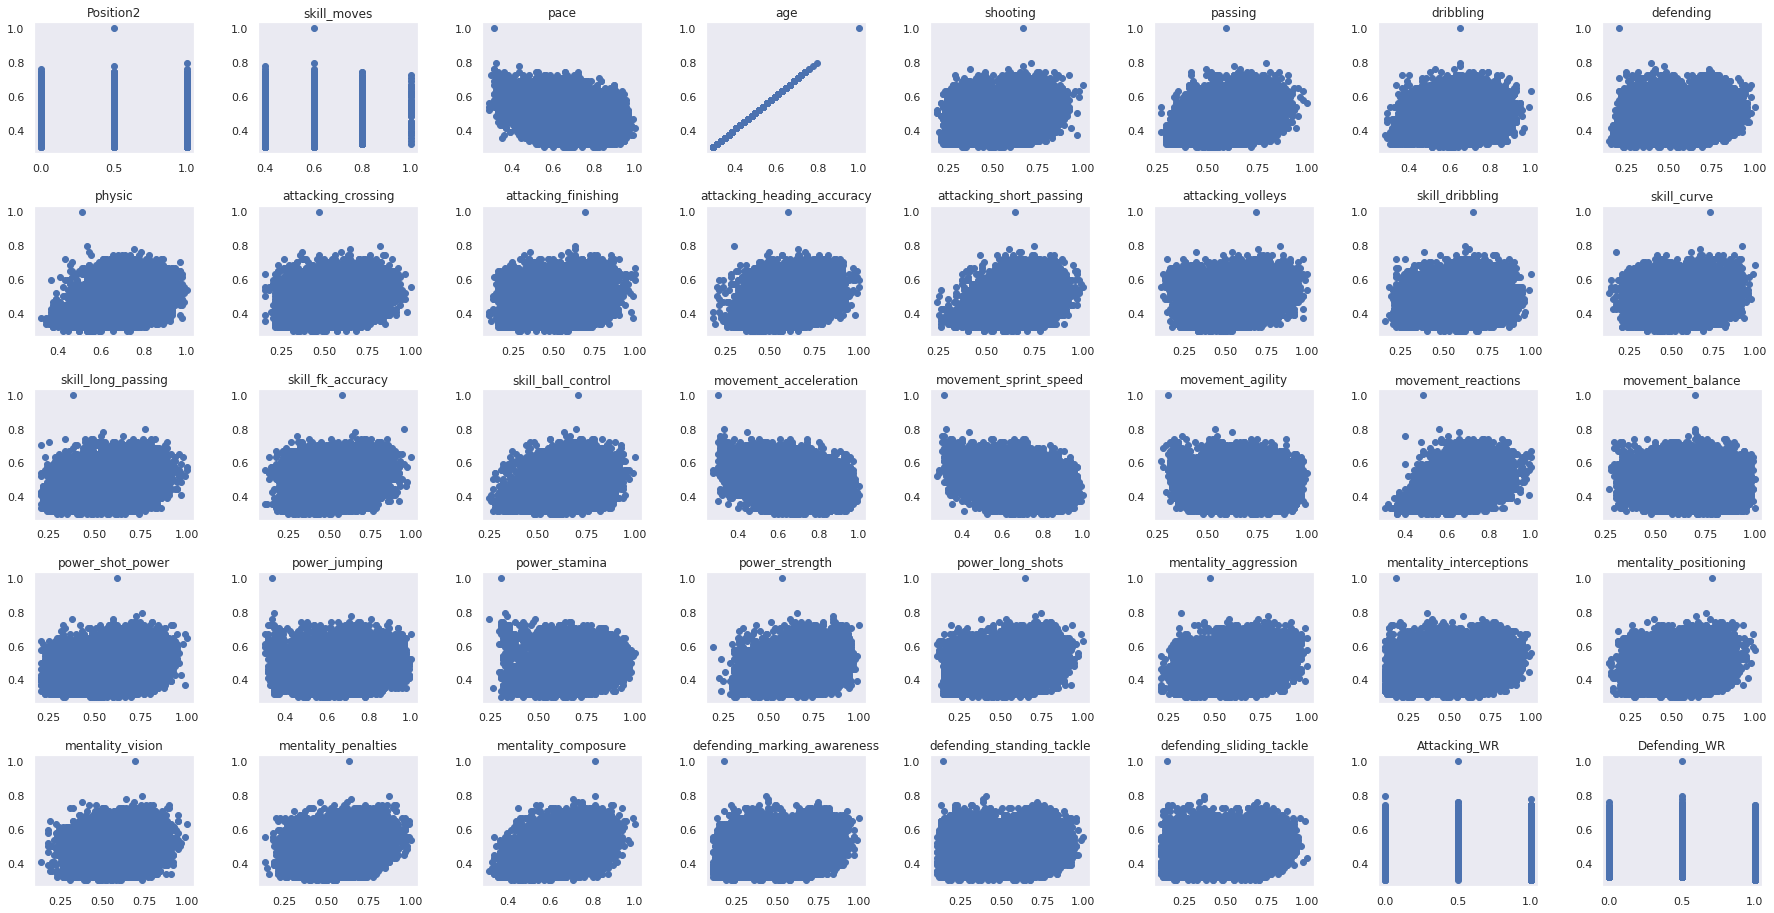

In [60]:
multiple_plot(df_new, data_vs = 'age', n_col = 8)

## 3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica.Elección justificada de hiper-parámetros

**A. K-MEANS**

In [61]:
df_new

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0          0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1          0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2          0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3          0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4          1.000        0.800 0.784 0.556     0.915    1.000      0.926   
...          ...          ...   ...   ...       ...      ...        ...   
17049      1.000        0.400 0.598 0.407     0.372    0.495      0.505   
17050      1.000        0.400 0.608 0.352     0.415    0.538      0.484   
17051      1.000        0.400 0.619 0.389     0.394    0.484      0.516   
17052      0.500        0.400 0.701 0.352     0.489    0.387      0.505   
17053      1.000        0.400 0.701 0.352     0.404    0.484      0.505   

       defending  physic  attacking_crossing  attacking_finishing  \
0          0.374   0.722               0.904                1.000   
1          0.484   0.911               0.755                1.000   
2          0.374   0.833               0.926                1.000   
3          0.407   0.700               0.904                0.874   
4          0.703   0.867               1.000                0.863   
...          ...     ...                 ...                  ...   
17049      0.462   0.544               0.489                0.337   
17050      0.451   0.567               0.574                0.347   
17051      0.451   0.578               0.415                0.337   
17052      0.165   0.467               0.309                0.516   
17053      0.396   0.533               0.415                0.337   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                           0.753                    0.968              0.978   
1                           0.968                    0.904              0.989   
2                           0.968                    0.851              0.956   
3                           0.677                    0.915              0.956   
4                           0.591                    1.000              0.911   
...                           ...                      ...                ...   
17049                       0.516                    0.532              0.333   
17050                       0.495                    0.543              0.356   
17051                       0.462                    0.521              0.411   
17052                       0.430                    0.404              0.378   
17053                       0.495                    0.532              0.411   

       skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0                1.000        0.989               0.978              1.000   
1                0.885        0.840               0.753              0.904   
2                0.917        0.862               0.828              0.894   
3                0.990        0.936               0.871              0.926   
4                0.917        0.904               1.000              0.883   
...                ...          ...                 ...                ...   
17049            0.469        0.351               0.516              0.404   
17050            0.427        0.564               0.538              0.330   
17051            0.490        0.394               0.527              0.394   
17052            0.438        0.383               0.355              0.362   
17053            0.500        0.404               0.527              0.340   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                   1.000                  0.938                  0.825   
1                   0.917                  0.794                  0.814   
2                   0.917                  0.876                  0.907   
3                   0.990                  0.959                  0

In [62]:
df_new.shape

(17054, 40)

Elección de la cantidad de grupos/clusters: 
Utilizamos el criterio del codo evaluando como medida de ajuste la inercia, la silueta y el coeficiente de Calinski.
- Inercia: es la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide
- Coeficiente de Silueta: Se calcula utilizando la distancia media dentro del grupo y la distancia media del grupo más cercano para cada muestra. Es la distancia entre una muestra y el grupo más cercano del que la muestra no forma parte. Nos indica que tan compacto es el cluster.
- Coeficiente de Calinsky: También conocido como criterio de la relación de varianza, cuanto más alto, mejor definidos están los cluster. El índice es la relación de la suma de la dispersión entre conglomerados y la dispersión dentro del conglomerado para todos los conglomerados

In [63]:
from sklearn.cluster import KMeans,MeanShift

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

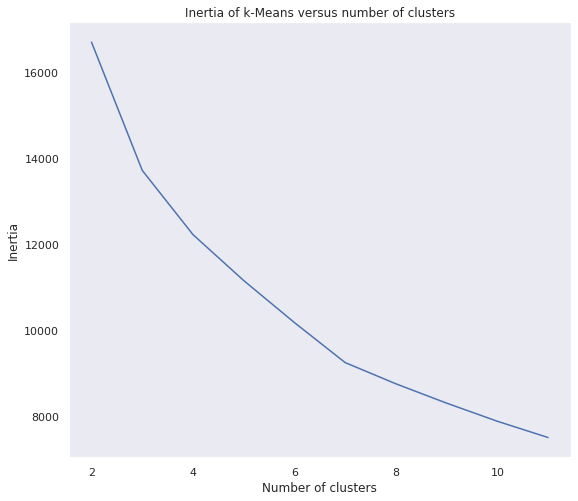

In [65]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_new).inertia_ for i in range(2,12)]

plt.figure(figsize=(9,8))
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [66]:
def eleccion_cluster(X_train):
    inertia_eu = []
    silhouet_eu = []
    calinski_eu = []
    
    for n in range(2, 15):
        km = KMeans(n_clusters=n, random_state=42).fit(X_train) 
        inertia_eu.append(km.inertia_)
        silhouet_eu.append(silhouette_score(X_train, km.labels_,  metric='euclidean'))
        calinski_eu.append(calinski_harabasz_score(X_train, km.labels_))

    inertia_dtw = []
    silhouet_dtw = []
    calinski_dtw = []
    
    for n in range(2, 15):
        km = KMeans(n_clusters=n, random_state=42).fit(X_train) 
        inertia_dtw.append(km.inertia_)
        silhouet_dtw.append(silhouette_score(X_train, km.labels_,  metric='euclidean'))
        calinski_dtw.append(calinski_harabasz_score(X_train, km.labels_))
    
    fig, axes = plt.subplots(1,3,figsize=(20,6))

    axes[0].plot(np.arange(2, 15), inertia_eu)
    axes[0].set_ylabel("Inertia")
    axes[0].set_title("Inertia of k-Means - Distancia Euclideana")
     
    axes[1].plot(np.arange(2, 15), silhouet_eu)
    axes[1].set_ylabel("Silhouet")
    axes[1].set_title("Silhouet score - Distancia Euclideana")
       
    axes[2].plot(np.arange(2, 15), calinski_eu)
    axes[2].set_xlabel('Number of clusters')
    axes[2].set_ylabel("Calinski")
    axes[2].set_title("Calinski harabasz Score - Distancia Euclideana")
    

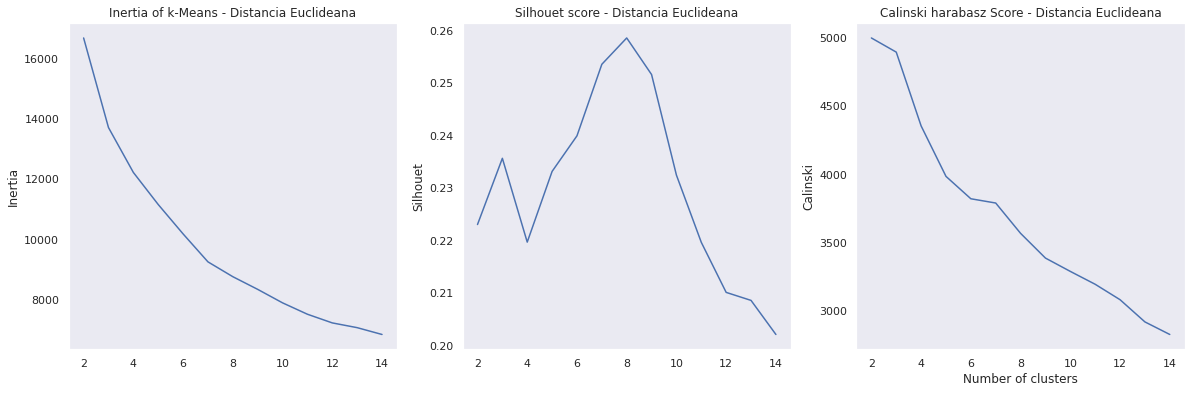

In [67]:
eleccion_cluster(df_new)

In [68]:
# Número de clusters elegido
n_clust = 3  ## 3

km = KMeans(n_clusters=n_clust,random_state=4)
km.fit(df_new) # Utiliza todas las variables

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [69]:
df_clusters=df_new.copy()

In [70]:
df_clusters['kmeans_3'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0      0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1      0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2      0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3      0.500        1.000 0.938 0.537     0.883    0.925      0.989   

   defending  physic  attacking_crossing  attacking_finishing  \
0      0.374   0.722               0.904                1.000   
1      0.484   0.911               0.755                1.000   
2      0.374   0.833               0.926                1.000   
3      0.407   0.700               0.904                0.874   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                       0.753                    0.968              0.978   
1                       0.968                    0.904              0.989   
2                       0.968                    0.851              0.956   
3                       0.677                    0.915              0.956   

   skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0            1.000        0.989               0.978              1.000   
1            0.885        0.840               0.753              0.904   
2            0.917        0.862               0.828              0.894   
3            0.990        0.936               0.871              0.926   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0               1.000                  0.938                  0.825   
1               0.917                  0.794                  0.814   
2               0.917                  0.876                  0.907   
3               0.990                  0.959                  0.918   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0             0.948               1.000             0.990             0.905   
1             0.802               0.989             0.854             0.947   
2             0.896               1.000             0.771             0.989   
3             1.000               0.947             0.875             0.842   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0          0.716          0.742           0.711             1.000   
1          0.895          0.784           0.887             0.926   
2          1.000          0.794           0.794             0.989   
3          0.674          0.835           0.546             0.862   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                 0.463                    0.440                  0.969   
1                 0.853                    0.538                  0.990   
2                 0.663                    0.319                  0.990   
3                 0.663                    0.407                  0.896   

   mentality_vision  mentality_penalties  mentality_composure  \
0             1.000                0.806                1.000   
1             0.853                0.968                0.917   
2             0.800                0.946                0.990   
3             0.947                1.000                0.969   

   defending_marking_awareness  defending_standing_tackle  \
0                        0.215                      0.376   
1                        0.376                      0.452   
2                        0.258                      0.344   
3                        0.376                      0.344   

   defending_sliding_tackle  Attacking_WR  Defending_WR  kmeans_3  
0                     0.261         1.000         0.500         0  
1                     0.207         0.000         1.000         2  
2                     0.261         0.000         0.500         2  
3                     0.315         0.000         1.000         2

In [71]:
df_clusters.columns[25]

'power_jumping'

In [72]:
df_clusters.columns[20]

'movement_sprint_speed'

In [73]:
#Elegimo dos números entre 0 y  de n_skills-1
skill_1=df_clusters.columns[25]  
skill_2=df_clusters.columns[20] 

In [74]:
kmean_clusters = go.Scatter(x=df_clusters[skill_1], y=df_clusters[skill_2],
                           mode='markers',
                        #text=df_clusters.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [75]:
#En Colab:
fig.show(renderer="colab")

Como no encontramos nada muy definido decidimos aplicar PCA para la visualizacion y asi reducir la cantidad de variables en n componentes principales

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=20)
pca.fit(df_new)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 4.24617164e-01  1.33751492e-01  8.15959618e-02  1.40834434e-02
   2.17434278e-01  1.13499793e-01  1.30490392e-01 -1.50083077e-01
  -3.42586251e-02  1.24130995e-01  2.44451559e-01 -3.53199239e-02
   7.53860993e-02  2.12855707e-01  1.59252167e-01  1.85291174e-01
   6.99214561e-02  1.64852043e-01  1.10945050e-01  9.08623505e-02
   7.41376517e-02  1.29958118e-01  4.86880130e-02  9.94046325e-02
   1.62186644e-01 -3.46437835e-02  2.95340139e-02 -5.58265773e-02
   2.25826212e-01 -4.89093048e-02 -1.55965566e-01  2.02002978e-01
   1.64136124e-01  1.56296402e-01  7.79685023e-02 -1.49539144e-01
  -1.67642528e-01 -1.78324794e-01 -3.59483815e-01  2.73416534e-02]
 [-1.29116264e-01  2.94189935e-02 -5.62703259e-03  6.94369237e-02
   1.11349776e-02  9.55328834e-02  5.10505945e-02  2.50660226e-01
   1.31671944e-01  1.01206387e-01 -2.25080799e-02  9.35820772e-02
   9.73764249e-02  8.35141966e-03  4.34142985e-02  7.35957076e-02
   1.33321026e-01  6.87765357e-02  6.50006454e-02 -8.2

Text(0.5, 1.0, 'Suma acumulada de Porcentaje de varianza explicado')

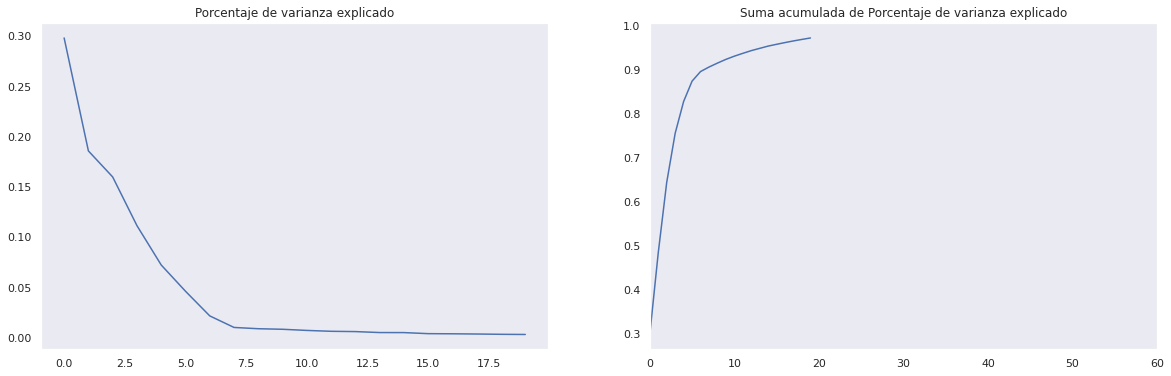

In [78]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
plt.xlim([0,60])
#plt.ylim([0,.05])
sns.lineplot(data=pca.explained_variance_ratio_, ax=ax[0]).set_title("Porcentaje de varianza explicado")
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), ax=ax[1]).set_title("Suma acumulada de Porcentaje de varianza explicado")

In [79]:
x_reduced = pca.transform(df_new)

Como vemos que las 10 primeras componentes principales explican el 90% de la varianza nos quedamos con esas.

In [80]:
x_reduced = x_reduced[:,:10]

In [81]:
cols_names = [(str('pca'+str(i))) for i in range(10)]

In [82]:

df_pca = pd.DataFrame(x_reduced,columns=cols_names)

In [83]:
df_pca

pca0   pca1   pca2   pca3   pca4   pca5   pca6   pca7   pca8   pca9
0      1.334  0.100  0.636 -0.135  1.106 -0.204  0.148  0.056  0.202 -0.090
1      1.401  0.447 -0.171 -0.497  0.620  0.486 -0.124 -0.109  0.152 -0.010
2      1.578  0.560 -0.149 -0.042  0.834  0.245 -0.119 -0.074  0.211 -0.087
3      1.581  0.316 -0.231 -0.525  0.574 -0.140  0.069  0.049  0.191 -0.130
4      1.428  1.262  0.512  0.032  0.192 -0.035  0.115  0.099 -0.022 -0.063
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
17049 -0.304 -0.722  0.215  0.181 -0.637 -0.037  0.037 -0.105  0.068 -0.032
17050 -0.157 -0.702  0.248  0.134 -0.561 -0.098  0.083 -0.029 -0.061 -0.073
17051 -0.249 -0.736  0.218  0.189 -0.606 -0.010  0.014 -0.048 -0.059 -0.034
17052 -0.108 -1.214 -0.302  0.484 -0.067 -0.121  0.062 -0.102  0.003  0.043
17053 -0.145 -0.821  0.155  0.229 -0.552 -0.189 -0.127 -0.157  0.063  0.007

[17054 rows x 10 columns]

In [84]:
df_clusters_1=df_pca.copy()

In [85]:
df_clusters_1.shape

(17054, 10)

In [86]:
df_clusters_1

pca0   pca1   pca2   pca3   pca4   pca5   pca6   pca7   pca8   pca9
0      1.334  0.100  0.636 -0.135  1.106 -0.204  0.148  0.056  0.202 -0.090
1      1.401  0.447 -0.171 -0.497  0.620  0.486 -0.124 -0.109  0.152 -0.010
2      1.578  0.560 -0.149 -0.042  0.834  0.245 -0.119 -0.074  0.211 -0.087
3      1.581  0.316 -0.231 -0.525  0.574 -0.140  0.069  0.049  0.191 -0.130
4      1.428  1.262  0.512  0.032  0.192 -0.035  0.115  0.099 -0.022 -0.063
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
17049 -0.304 -0.722  0.215  0.181 -0.637 -0.037  0.037 -0.105  0.068 -0.032
17050 -0.157 -0.702  0.248  0.134 -0.561 -0.098  0.083 -0.029 -0.061 -0.073
17051 -0.249 -0.736  0.218  0.189 -0.606 -0.010  0.014 -0.048 -0.059 -0.034
17052 -0.108 -1.214 -0.302  0.484 -0.067 -0.121  0.062 -0.102  0.003  0.043
17053 -0.145 -0.821  0.155  0.229 -0.552 -0.189 -0.127 -0.157  0.063  0.007

[17054 rows x 10 columns]

In [87]:
df_cluster_2 = df_clusters_1[['pca0','pca1']]

In [88]:
df_clusters.columns

Index(['Position2', 'skill_moves', 'pace', 'age', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_long_passing', 'skill_fk_accuracy',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', 'Attacking_WR',
       'Defending_WR', 'kmeans_3'],
      dtype='object')

In [89]:
df_cluster_2['k_means']=df_clusters['kmeans_3']

In [90]:
df_cluster_2

pca0   pca1  k_means
0      1.334  0.100        0
1      1.401  0.447        2
2      1.578  0.560        2
3      1.581  0.316        2
4      1.428  1.262        2
...      ...    ...      ...
17049 -0.304 -0.722        0
17050 -0.157 -0.702        0
17051 -0.249 -0.736        0
17052 -0.108 -1.214        0
17053 -0.145 -0.821        0

[17054 rows x 3 columns]

In [91]:
df_cluster_2

pca0   pca1  k_means
0      1.334  0.100        0
1      1.401  0.447        2
2      1.578  0.560        2
3      1.581  0.316        2
4      1.428  1.262        2
...      ...    ...      ...
17049 -0.304 -0.722        0
17050 -0.157 -0.702        0
17051 -0.249 -0.736        0
17052 -0.108 -1.214        0
17053 -0.145 -0.821        0

[17054 rows x 3 columns]

In [92]:
df_cluster_2['short_name'] = df_1['short_name']

In [93]:
kmean_clusters = go.Scatter(x=df_cluster_2['pca0'], y=df_cluster_2['pca1'],
                           mode='markers',
                        text=df_cluster_2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='pca0'),
                yaxis=dict(title='pca1'),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [94]:
fig.show(renderer="colab")

In [95]:
df_new

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0          0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1          0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2          0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3          0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4          1.000        0.800 0.784 0.556     0.915    1.000      0.926   
...          ...          ...   ...   ...       ...      ...        ...   
17049      1.000        0.400 0.598 0.407     0.372    0.495      0.505   
17050      1.000        0.400 0.608 0.352     0.415    0.538      0.484   
17051      1.000        0.400 0.619 0.389     0.394    0.484      0.516   
17052      0.500        0.400 0.701 0.352     0.489    0.387      0.505   
17053      1.000        0.400 0.701 0.352     0.404    0.484      0.505   

       defending  physic  attacking_crossing  attacking_finishing  \
0          0.374   0.722               0.904                1.000   
1          0.484   0.911               0.755                1.000   
2          0.374   0.833               0.926                1.000   
3          0.407   0.700               0.904                0.874   
4          0.703   0.867               1.000                0.863   
...          ...     ...                 ...                  ...   
17049      0.462   0.544               0.489                0.337   
17050      0.451   0.567               0.574                0.347   
17051      0.451   0.578               0.415                0.337   
17052      0.165   0.467               0.309                0.516   
17053      0.396   0.533               0.415                0.337   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                           0.753                    0.968              0.978   
1                           0.968                    0.904              0.989   
2                           0.968                    0.851              0.956   
3                           0.677                    0.915              0.956   
4                           0.591                    1.000              0.911   
...                           ...                      ...                ...   
17049                       0.516                    0.532              0.333   
17050                       0.495                    0.543              0.356   
17051                       0.462                    0.521              0.411   
17052                       0.430                    0.404              0.378   
17053                       0.495                    0.532              0.411   

       skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0                1.000        0.989               0.978              1.000   
1                0.885        0.840               0.753              0.904   
2                0.917        0.862               0.828              0.894   
3                0.990        0.936               0.871              0.926   
4                0.917        0.904               1.000              0.883   
...                ...          ...                 ...                ...   
17049            0.469        0.351               0.516              0.404   
17050            0.427        0.564               0.538              0.330   
17051            0.490        0.394               0.527              0.394   
17052            0.438        0.383               0.355              0.362   
17053            0.500        0.404               0.527              0.340   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                   1.000                  0.938                  0.825   
1                   0.917                  0.794                  0.814   
2                   0.917                  0.876                  0.907   
3                   0.990                  0.959                  0

In [96]:
df_1['k_means_3'] = km.labels_

In [97]:
df_c1 = df_1[df_1['k_means_3']==0]
df_c2 = df_1[df_1['k_means_3']==1]
df_c3 = df_1[df_1['k_means_3']==2]

**B. MEAN SHIFT**

Se intentó aplicar este algoritmo pero no encontraba más de un cluster con un bandwith de 1000. Incluso con la busqueda del mejor hiperparámtero que nos daba 1.36 daba error porque decía no encontrar ningún cluster.

In [98]:
# ms = MeanShift(bandwidth=1000, bin_seeding=True)

# ms.fit(df_new)

# clusters2 = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(clusters2)
# n_clusters_ = len(labels_unique)

# print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

**C. DBSCAN**

In [99]:
from sklearn.cluster import estimate_bandwidth 

In [100]:
from sklearn.cluster import DBSCAN

In [101]:
df_new

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0          0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1          0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2          0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3          0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4          1.000        0.800 0.784 0.556     0.915    1.000      0.926   
...          ...          ...   ...   ...       ...      ...        ...   
17049      1.000        0.400 0.598 0.407     0.372    0.495      0.505   
17050      1.000        0.400 0.608 0.352     0.415    0.538      0.484   
17051      1.000        0.400 0.619 0.389     0.394    0.484      0.516   
17052      0.500        0.400 0.701 0.352     0.489    0.387      0.505   
17053      1.000        0.400 0.701 0.352     0.404    0.484      0.505   

       defending  physic  attacking_crossing  attacking_finishing  \
0          0.374   0.722               0.904                1.000   
1          0.484   0.911               0.755                1.000   
2          0.374   0.833               0.926                1.000   
3          0.407   0.700               0.904                0.874   
4          0.703   0.867               1.000                0.863   
...          ...     ...                 ...                  ...   
17049      0.462   0.544               0.489                0.337   
17050      0.451   0.567               0.574                0.347   
17051      0.451   0.578               0.415                0.337   
17052      0.165   0.467               0.309                0.516   
17053      0.396   0.533               0.415                0.337   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                           0.753                    0.968              0.978   
1                           0.968                    0.904              0.989   
2                           0.968                    0.851              0.956   
3                           0.677                    0.915              0.956   
4                           0.591                    1.000              0.911   
...                           ...                      ...                ...   
17049                       0.516                    0.532              0.333   
17050                       0.495                    0.543              0.356   
17051                       0.462                    0.521              0.411   
17052                       0.430                    0.404              0.378   
17053                       0.495                    0.532              0.411   

       skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0                1.000        0.989               0.978              1.000   
1                0.885        0.840               0.753              0.904   
2                0.917        0.862               0.828              0.894   
3                0.990        0.936               0.871              0.926   
4                0.917        0.904               1.000              0.883   
...                ...          ...                 ...                ...   
17049            0.469        0.351               0.516              0.404   
17050            0.427        0.564               0.538              0.330   
17051            0.490        0.394               0.527              0.394   
17052            0.438        0.383               0.355              0.362   
17053            0.500        0.404               0.527              0.340   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                   1.000                  0.938                  0.825   
1                   0.917                  0.794                  0.814   
2                   0.917                  0.876                  0.907   
3                   0.990                  0.959                  0

In [102]:
X = df_new.values

In [103]:
clustering = DBSCAN(eps=0.5,min_samples=300, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(X)

In [104]:
clusters2 = clustering.labels_
labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)


In [105]:
n_clusters_

5

In [106]:
df_clusters_db = df_new.copy()

In [107]:
df_clusters_db['kmeans_8'] = clustering.labels_

In [108]:
df_clusters_db['short_name'] = df_1['short_name']

In [109]:
df_clusters_db

Position2  skill_moves  pace   age  shooting  passing  dribbling  \
0          0.500        0.800 0.876 0.630     0.979    0.978      1.000   
1          0.500        0.800 0.804 0.593     0.979    0.849      0.905   
2          0.500        1.000 0.897 0.667     1.000    0.860      0.926   
3          0.500        1.000 0.938 0.537     0.883    0.925      0.989   
4          1.000        0.800 0.784 0.556     0.915    1.000      0.926   
...          ...          ...   ...   ...       ...      ...        ...   
17049      1.000        0.400 0.598 0.407     0.372    0.495      0.505   
17050      1.000        0.400 0.608 0.352     0.415    0.538      0.484   
17051      1.000        0.400 0.619 0.389     0.394    0.484      0.516   
17052      0.500        0.400 0.701 0.352     0.489    0.387      0.505   
17053      1.000        0.400 0.701 0.352     0.404    0.484      0.505   

       defending  physic  attacking_crossing  attacking_finishing  \
0          0.374   0.722               0.904                1.000   
1          0.484   0.911               0.755                1.000   
2          0.374   0.833               0.926                1.000   
3          0.407   0.700               0.904                0.874   
4          0.703   0.867               1.000                0.863   
...          ...     ...                 ...                  ...   
17049      0.462   0.544               0.489                0.337   
17050      0.451   0.567               0.574                0.347   
17051      0.451   0.578               0.415                0.337   
17052      0.165   0.467               0.309                0.516   
17053      0.396   0.533               0.415                0.337   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                           0.753                    0.968              0.978   
1                           0.968                    0.904              0.989   
2                           0.968                    0.851              0.956   
3                           0.677                    0.915              0.956   
4                           0.591                    1.000              0.911   
...                           ...                      ...                ...   
17049                       0.516                    0.532              0.333   
17050                       0.495                    0.543              0.356   
17051                       0.462                    0.521              0.411   
17052                       0.430                    0.404              0.378   
17053                       0.495                    0.532              0.411   

       skill_dribbling  skill_curve  skill_long_passing  skill_fk_accuracy  \
0                1.000        0.989               0.978              1.000   
1                0.885        0.840               0.753              0.904   
2                0.917        0.862               0.828              0.894   
3                0.990        0.936               0.871              0.926   
4                0.917        0.904               1.000              0.883   
...                ...          ...                 ...                ...   
17049            0.469        0.351               0.516              0.404   
17050            0.427        0.564               0.538              0.330   
17051            0.490        0.394               0.527              0.394   
17052            0.438        0.383               0.355              0.362   
17053            0.500        0.404               0.527              0.340   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                   1.000                  0.938                  0.825   
1                   0.917                  0.794                  0.814   
2                   0.917                  0.876                  0.907   
3                   0.990                  0.959                  0

In [110]:
skill_1=df_clusters_db.columns[6]  
skill_2=df_clusters_db.columns[5] 

In [111]:
kmean_clusters = go.Scatter(x=df_clusters_db[skill_1], y=df_clusters_db[skill_2],
                           mode='markers',
                        text=df_clusters_db.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering DBScan ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [112]:
#En Colab:
fig.show(renderer="colab")

Procedemos a aplicar PCA para una mejor visualizacion

In [113]:
df_cluster_2=df_cluster_2.drop('k_means',axis=1)

In [114]:
df_cluster_2['db_scan'] = df_clusters_db['kmeans_8']

In [115]:
df_cluster_2

pca0   pca1          short_name  db_scan
0      1.334  0.100            L. Messi       -1
1      1.401  0.447      R. Lewandowski       -1
2      1.578  0.560   Cristiano Ronaldo       -1
3      1.581  0.316           Neymar Jr       -1
4      1.428  1.262        K. De Bruyne       -1
...      ...    ...                 ...      ...
17049 -0.304 -0.722           Song Defu        0
17050 -0.157 -0.702           C. Porter        0
17051 -0.249 -0.736            N. Logue        0
17052 -0.108 -1.214           L. Rudden       -1
17053 -0.145 -0.821  E. Lalchhanchhuaha       -1

[17054 rows x 4 columns]

In [116]:
skill_1=df_cluster_2.columns[0]  
skill_2=df_cluster_2.columns[1] 

In [117]:
kmean_clusters = go.Scatter(x=df_cluster_2[skill_1], y=df_cluster_2[skill_2],
                           mode='markers',
                        text=df_cluster_2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [118]:
#En Colab:
fig.show(renderer="colab")

In [119]:
df_db = df_1.copy()

In [120]:
df_db['Label_db'] = clustering.labels_

In [121]:
df_db['Label_db'].value_counts()

-1    11501
 1     2431
 0     1953
 3      648
 2      521
Name: Label_db, dtype: int64

**D. CLUSTERING JERARQUICO**

In [122]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as  shc

In [123]:
AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

AgglomerativeClustering()

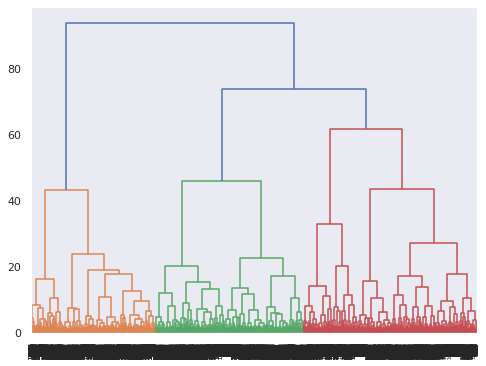

In [124]:
clusters = shc.linkage(df_new, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = shc.dendrogram(clusters)
#Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); # aca le pasamos parametro y para la linea de corte.
#Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson'); 


In [125]:
df_new.columns

Index(['Position2', 'skill_moves', 'pace', 'age', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_long_passing', 'skill_fk_accuracy',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', 'Attacking_WR',
       'Defending_WR'],
      dtype='object')

In [126]:
clusters

array([[1.57620000e+04, 1.62950000e+04, 1.38415839e-01, 2.00000000e+00],
       [6.99300000e+03, 7.98500000e+03, 1.52334403e-01, 2.00000000e+00],
       [1.26860000e+04, 1.40540000e+04, 1.62812119e-01, 2.00000000e+00],
       ...,
       [3.41000000e+04, 3.41020000e+04, 6.18114076e+01, 6.60700000e+03],
       [3.41030000e+04, 3.41040000e+04, 7.38665937e+01, 1.22820000e+04],
       [3.41010000e+04, 3.41050000e+04, 9.41590514e+01, 1.70540000e+04]])

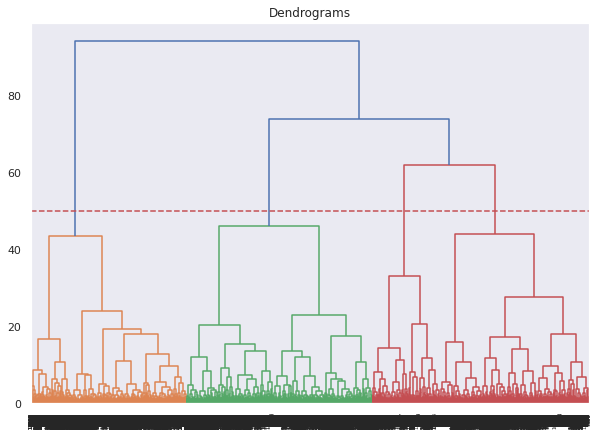

In [127]:
plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")

z = shc.linkage(df_new, method='ward')

dend = shc.dendrogram( z )

plt.axhline(y=50, color='r', linestyle='--')

plt.show()

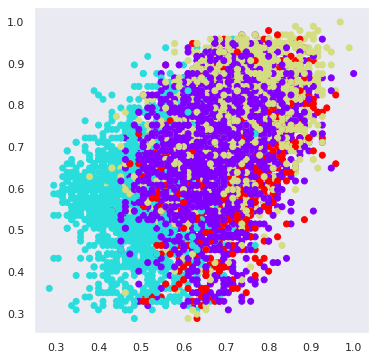

In [128]:
ac2 = AgglomerativeClustering(n_clusters = 4)

#Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_new['dribbling'], df_new['pace'],
          c = ac2.fit_predict(df_new), cmap ='rainbow')
plt.show()

In [129]:
c = ac2.fit_predict(df_new)

In [130]:
len(c)

17054

In [144]:
kmean_clusters = go.Scatter(x=df_cluster_2[skill_1], y=df_cluster_2[skill_2],
                           mode='markers',
                        text=df_cluster_2.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = c.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [145]:
#En Colab:
fig.show(renderer="colab")

## 4- Evaluación y Análisis de los clusters encontrados.

**A. K-MEANS**
Dos cluster son heterogeneos por posiciones pero se diferencian en su valuacion promedio y sueldo promedio en euros resaltados por sus habilidades con altos puntajes. El otro cluster es homogéneo en posición.

In [146]:
df_c1.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 6753.000   6753.000      6753.000   6753.000 6753.000   6753.000   
mean    64.894     70.807   2387293.795   8042.026   24.605    179.489   
std      6.777      5.915   6037816.573  17894.766    4.716      6.242   
min     47.000     51.000     35000.000    500.000   16.000    160.000   
25%     60.000     67.000    500000.000   1000.000   21.000    175.000   
50%     65.000     71.000    925000.000   3000.000   24.000    180.000   
75%     69.000     75.000   1900000.000   7000.000   28.000    184.000   
max     93.000     93.000 100000000.000 350000.000   54.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   6753.000      6753.000      6753.000        6753.000   6753.000   
mean      73.162     52472.001         1.370          58.333      3.056   
std        6.495     54581.451         0.756          49.741      0.616   
min       49.000         1.000         1.000           1.000      1.000   
25%       69.000       567.000         1.000          21.000      3.000   
50%       73.000      1961.000         1.000          45.000      3.000   
75%       77.000    111327.000         1.000          60.000      3.000   
max      110.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     6753.000                  6753.000            6753.000 6753.000   
mean         2.597                     1.083         4493434.414   67.500   
std          0.628                     0.349        11585289.457    9.996   
min          2.000                     1.000           54000.000   28.000   
25%          2.000                     1.000          833000.000   62.000   
50%          3.000                     1.000         1600000.000   68.000   
75%          3.000                     1.000         3500000.000   74.000   
max          5.000                     5.000       193700000.000   94.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  6753.000 6753.000   6753.000   6753.000 6753.000            6753.000   
mean     57.497   59.236     64.677     46.012   62.141              54.124   
std       9.729    9.020      7.164     16.192   10.258              11.911   
min      26.000   30.000     40.000     15.000   31.000              20.000   
25%      51.000   53.000     60.000     31.000   55.000              46.000   
50%      58.000   59.000     65.000     46.000   63.000              55.000   
75%      64.000   65.000     69.000     60.000   70.000              63.000   
max      92.000   91.000     95.000     87.000   89.000              91.000   

       attacking_finishing  attacking_heading_accuracy  \
count             6753.000                    6753.000   
mean                56.272                      53.747   
std                 11.547                      11.388   
min                 19.000                      17.000   
25%                 49.000                      45.000   
50%                 58.000                      54.000   
75%                 64.000                      62.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 6753.000           6753.000         6753.000   
mean                    64.202             50.780           63.865   
std                      8.598             11.957            8.211   
min                     28.000             12.000           24.000   
25%                     59.000             42.000           59.000   
50%                     65.000             50.000           64.000   
75%                     70.000             59.000           69.000   
max                     93.000             90.000           96.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     6753.000     

In [147]:
df_c2.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 5138.000   5138.000      5138.000   5138.000 5138.000   5138.000   
mean    64.996     70.390   2044927.014   7143.266   25.206    183.560   
std      6.421      5.819   5279317.630  14348.327    4.681      6.124   
min     47.000     50.000     15000.000    500.000   16.000    160.000   
25%     61.000     66.000    450000.000   1000.000   21.000    180.000   
50%     65.000     70.000    825000.000   2000.000   25.000    184.000   
75%     69.000     74.000   1600000.000   6000.000   29.000    188.000   
max     89.000     91.000 102500000.000 230000.000   41.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   5138.000      5138.000      5138.000        5138.000   5138.000   
mean      76.754     52929.215         1.362          59.701      2.777   
std        6.491     54631.883         0.756          51.972      0.595   
min       52.000         1.000         1.000           1.000      1.000   
25%       72.000       576.000         1.000          21.000      2.000   
50%       77.000      1962.000         1.000          45.000      3.000   
75%       81.000    111397.000         1.000          61.000      3.000   
max      100.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     5138.000                  5138.000            5138.000 5138.000   
mean         2.093                     1.062         3881224.796   63.149   
std          0.295                     0.288        10253926.868   10.945   
min          2.000                     1.000           23000.000   28.000   
25%          2.000                     1.000          739500.000   57.000   
50%          2.000                     1.000         1500000.000   64.000   
75%          2.000                     1.000         3100000.000   71.000   
max          4.000                     4.000       197300000.000   93.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  5138.000 5138.000   5138.000   5138.000 5138.000            5138.000   
mean     36.931   50.308     54.083     63.662   68.390              47.414   
std       9.525    9.089      9.145      7.388    7.897              14.508   
min      18.000   25.000     27.000     40.000   37.000              15.000   
25%      29.250   44.000     48.000     59.000   63.000              35.000   
50%      35.000   50.500     55.000     63.000   69.000              49.000   
75%      43.000   57.000     61.000     68.000   74.000              59.000   
max      70.000   76.000     81.000     91.000   88.000              82.000   

       attacking_finishing  attacking_heading_accuracy  \
count             5138.000                    5138.000   
mean                32.423                      60.835   
std                 10.265                      10.269   
min                 10.000                      23.000   
25%                 24.000                      54.000   
50%                 31.000                      62.000   
75%                 39.000                      68.000   
max                 75.000                      88.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 5138.000           5138.000         5138.000   
mean                    58.322             32.633           50.170   
std                      9.635              9.375           12.044   
min                     23.000             10.000           16.000   
25%                     53.000             26.000           42.000   
50%                     60.000             31.000           52.000   
75%                     65.000             37.000           59.000   
max                     84.000             74.000           81.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     5138.000     

In [148]:
df_c3.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 5163.000   5163.000      5163.000   5163.000 5163.000   5163.000   
mean    68.215     72.648   4634140.035  13257.757   25.571    178.406   
std      6.555      6.207  10821788.249  25666.005    4.390      6.182   
min     47.000     49.000     15000.000    500.000   16.000    155.000   
25%     64.000     68.000    750000.000   2000.000   22.000    174.000   
50%     68.000     72.000   1500000.000   5000.000   25.000    178.000   
75%     72.000     77.000   3200000.000  13000.000   29.000    183.000   
max     92.000     95.000 194000000.000 350000.000   43.000    201.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   5163.000      5163.000      5163.000        5163.000   5163.000   
mean      72.653     45472.770         1.333          58.528      3.152   
std        6.382     53590.001         0.736          49.069      0.685   
min       51.000         1.000         1.000           1.000      1.000   
25%       68.000       347.000         1.000          21.000      3.000   
50%       72.000      1881.000         1.000          45.000      3.000   
75%       77.000    110968.500         1.000          61.000      4.000   
max      100.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     5163.000                  5163.000            5163.000 5163.000   
mean         2.846                     1.145         8769762.502   74.198   
std          0.667                     0.461        20859810.833    9.091   
min          2.000                     1.000           23000.000   28.000   
25%          2.000                     1.000         1300000.000   69.000   
50%          3.000                     1.000         2600000.000   75.000   
75%          3.000                     1.000         6100000.000   81.000   
max          5.000                     5.000       373500000.000   97.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  5163.000 5163.000   5163.000   5163.000 5163.000            5163.000   
mean     60.912   61.729     68.219     47.188   64.736              60.454   
std       9.679    8.557      6.931     16.227    9.747              11.473   
min      31.000   33.000     44.000     14.000   29.000              21.000   
25%      55.000   56.000     64.000     33.000   59.000              54.000   
50%      62.000   62.000     68.000     47.000   66.000              62.000   
75%      67.000   67.000     73.000     61.000   72.000              68.000   
max      94.000   93.000     94.000     89.000   90.000              94.000   

       attacking_finishing  attacking_heading_accuracy  \
count             5163.000                    5163.000   
mean                60.097                      55.751   
std                 11.480                      11.730   
min                 17.000                      17.000   
25%                 53.000                      48.000   
50%                 61.000                      56.000   
75%                 68.000                      64.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 5163.000           5163.000         5163.000   
mean                    65.480             54.211           67.872   
std                      8.207             12.182            7.745   
min                     30.000             12.000           38.000   
25%                     61.000             45.000           63.000   
50%                     65.000             55.000           68.000   
75%                     71.000             63.000           73.000   
max                     94.000             90.000           95.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     5163.000     

In [149]:
df_c1['Position2'].value_counts()

Midfielder    3753
Forward       2969
Defender        31
Name: Position2, dtype: int64

In [150]:
df_c2['Position2'].value_counts()

Defender      5106
Midfielder      24
Forward          8
Name: Position2, dtype: int64

In [151]:
df_c3['Position2'].value_counts()

Forward       2591
Midfielder    1340
Defender      1232
Name: Position2, dtype: int64

**CLUSTER 1**

Está compuesto por 6753 jugadores: el 55% mediocampistas, 44% por delanteros y 1% por defensores.

Tienen un promedio de potencia de 70 puntos.

El overall promedio (puntaje que tiene cada jugador en la posicion en la que juega) es de 65 puntos.

La valuación promedio en euros por jugador es de 2.387.293

El salario promedio en euros por jugador es de 8.042

Destacan en las características de agilidad del movimiento y balance del movimiento con 68 puntos.

Poseen menos de 50 puntos en todas las variables referidas a características de defensa.


**CLUSTER 2**

Compuesto por 5138 jugadores, el 99% por defensores.

Tienen un promedio de potencia de 70 puntos.

El overall promedio es de 65 puntos.

La valuación promedio en euros por jugador es de 2.044.927

El salario promedio en euros por jugador es de 7143

Destacan en las características de power strenght (fuerza) con 71 puntos.

Poseen muy pocos puntos en variables como potencia en tiros de larga distancia 35p, volea en ataque 32p, finalización del ataque 32p, shooting 37p.


**CLUSTER 3**

Está compuesto por 5163 jugadores: el 50% por delanteros,  26% mediocampistas, 24% defensores

Tienen un promedio de potencia de 72 puntos.

El overall promedio (puntaje que tiene cada jugador en la posicion en la que juega) es de 68 puntos.

La valuación promedio en euros por jugador es de 4.634.140

El salario promedio en euros por jugador es de 13.257

Destacan en las características de pase y aceleración del movimiento con 74 puntos.

Poseen menos de 50 puntos en todas las variables referidas a características de defensa. Y también en otras como mentality interceptions que es la capacidad para interceptar una pelota


**C. DBSCAN**

Podemos ver un cluster heterogeneo en posiciones donde lo q resalta es la valuacion promedio y el salario promedio en euros. Y para los otros si una separación por posiciones (en el que coinciden defensores, 3 y 4, son pocas las diferencias, quizás hubiese sido más optimo que estos formaran un solo cluster)

C1

In [152]:
df_db_1 = df_db[df_db['Label_db']==-1]

C2

In [153]:
df_db_2 = df_db[df_db['Label_db']==0]

C3

In [154]:
df_db_3 = df_db[df_db['Label_db']==1]

C4

In [155]:
df_db_4 = df_db[df_db['Label_db']==2]

C5

In [156]:
df_db_5 = df_db[df_db['Label_db']==3]

Vemos las características de cada cluster

In [157]:
df_db_1.describe()

overall  potential     value_eur   wage_eur       age  height_cm  \
count 11501.000  11501.000     11501.000  11501.000 11501.000  11501.000   
mean     67.410     71.856   3857394.574  12005.556    25.813    180.276   
std       6.801      6.256   9212483.030  23407.478     4.682      6.817   
min      47.000     49.000     15000.000    500.000    16.000    155.000   
25%      63.000     67.000    600000.000   2000.000    22.000    175.000   
50%      67.000     72.000   1300000.000   4000.000    26.000    180.000   
75%      72.000     76.000   2800000.000  12000.000    29.000    185.000   
max      93.000     95.000 194000000.000 350000.000    54.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count  11501.000     11501.000     11501.000       11501.000  11501.000   
mean      74.255     48936.516         1.310          59.192      3.061   
std        6.998     54200.304         0.701          49.367      0.671   
min       49.000         1.000         1.000           1.000      1.000   
25%       70.000       449.000         1.000          21.000      3.000   
50%       74.000      1915.000         1.000          45.000      3.000   
75%       79.000    111059.000         1.000          61.000      3.000   
max      110.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur      pace  \
count    11501.000                 11501.000           11501.000 11501.000   
mean         2.650                     1.137         7296538.162    68.872   
std          0.673                     0.443        17750650.323    11.966   
min          2.000                     1.000           23000.000    28.000   
25%          2.000                     1.000         1048600.000    63.000   
50%          3.000                     1.000         2200000.000    70.000   
75%          3.000                     1.000         5300000.000    77.000   
max          5.000                     5.000       373500000.000    97.000   

       shooting   passing  dribbling  defending    physic  attacking_crossing  \
count 11501.000 11501.000  11501.000  11501.000 11501.000           11501.000   
mean     55.719    58.960     64.428     50.045    65.398              55.724   
std      13.685    10.005      9.533     17.279    10.378              13.648   
min      18.000    25.000     27.000     14.000    29.000              15.000   
25%      47.000    52.000     59.000     34.000    59.000              47.000   
50%      58.000    59.000     65.000     52.000    67.000              58.000   
75%      66.000    66.000     71.000     65.000    73.000              66.000   
max      94.000    93.000     95.000     91.000    90.000              94.000   

       attacking_finishing  attacking_heading_accuracy  \
count            11501.000                   11501.000   
mean                53.984                      57.484   
std                 15.956                      12.477   
min                 10.000                      17.000   
25%                 43.000                      48.000   
50%                 58.000                      58.000   
75%                 66.000                      67.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                11501.000          11501.000        11501.000   
mean                    64.174             49.677           63.107   
std                      9.189             14.745           11.708   
min                     23.000             10.000           16.000   
25%                     59.000             38.000           58.000   
50%                     65.000             51.000           65.000   
75%                     70.000             61.000           71.000   
max                     94.000             90.000           96.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  s

In [158]:
df_db_1['Position2'].value_counts()

Forward       4920
Defender      3417
Midfielder    3164
Name: Position2, dtype: int64

In [159]:
df_db_2.describe()

overall  potential    value_eur  wage_eur      age  height_cm  \
count 1953.000   1953.000     1953.000  1953.000 1953.000   1953.000   
mean    62.948     70.308  1307903.226  4432.514   23.428    178.776   
std      6.103      5.639  1891480.710  7155.937    4.182      5.344   
min     47.000     52.000    35000.000   500.000   16.000    163.000   
25%     59.000     67.000   400000.000   900.000   20.000    175.000   
50%     63.000     70.000   775000.000  2000.000   23.000    179.000   
75%     67.000     74.000  1500000.000  5000.000   26.000    183.000   
max     78.000     87.000 28000000.000 87000.000   38.000    197.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   1953.000      1953.000      1953.000        1953.000   1953.000   
mean      72.124     54215.831         1.413          58.368      3.012   
std        5.485     54753.711         0.797          51.178      0.557   
min       56.000         1.000         1.000           1.000      1.000   
25%       68.000       696.000         1.000          21.000      3.000   
50%       72.000      2056.000         1.000          45.000      3.000   
75%       76.000    111539.000         2.000          59.000      3.000   
max       90.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     1953.000                  1953.000            1953.000 1953.000   
mean         2.412                     1.015         2477475.883   65.025   
std          0.530                     0.121         3806097.035    6.138   
min          2.000                     1.000           54000.000   40.000   
25%          2.000                     1.000          750000.000   62.000   
50%          2.000                     1.000         1400000.000   65.000   
75%          3.000                     1.000         2700000.000   69.000   
max          4.000                     2.000        56700000.000   85.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  1953.000 1953.000   1953.000   1953.000 1953.000            1953.000   
mean     52.543   60.564     63.177     55.877   62.396              52.753   
std       8.715    6.699      6.344      8.523    8.557               9.670   
min      29.000   39.000     43.000     29.000   36.000              28.000   
25%      46.000   56.000     59.000     51.000   57.000              46.000   
50%      53.000   61.000     63.000     57.000   63.000              53.000   
75%      59.000   65.000     67.000     62.000   69.000              60.000   
max      74.000   78.000     83.000     76.000   84.000              80.000   

       attacking_finishing  attacking_heading_accuracy  \
count             1953.000                    1953.000   
mean                49.681                      51.169   
std                 10.119                       8.362   
min                 21.000                      24.000   
25%                 42.000                      45.000   
50%                 51.000                      51.000   
75%                 57.000                      57.000   
max                 76.000                      77.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 1953.000           1953.000         1953.000   
mean                    66.193             45.161           61.767   
std                      6.052             10.004            7.290   
min                     41.000             21.000           36.000   
25%                     62.000             38.000           57.000   
50%                     66.000             44.000           62.000   
75%                     70.000             52.000           67.000   
max                     84.000             78.000           84.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     1953.000            1953.000   

In [160]:
df_db_2['Position2'].value_counts()

Midfielder    1953
Name: Position2, dtype: int64

In [161]:
df_db_3.describe()

overall  potential    value_eur  wage_eur      age  height_cm  \
count 2431.000   2431.000     2431.000  2431.000 2431.000   2431.000   
mean    62.965     69.675  1019640.066  3614.582   23.869    182.695   
std      5.325      5.277  1034981.424  5096.833    4.125      6.015   
min     48.000     51.000    45000.000   500.000   16.000    160.000   
25%     60.000     66.000   400000.000   850.000   21.000    179.000   
50%     63.000     70.000   725000.000  2000.000   23.000    183.000   
75%     67.000     73.000  1300000.000  4000.000   27.000    187.000   
max     77.000     85.000 15000000.000 60000.000   38.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   2431.000      2431.000      2431.000        2431.000   2431.000   
mean      75.594     55124.004         1.430          59.142      2.759   
std        6.150     54719.492         0.808          53.252      0.577   
min       55.000         1.000         1.000           1.000      1.000   
25%       71.000       700.000         1.000          21.000      2.000   
50%       75.000     15005.000         1.000          45.000      3.000   
75%       80.000    111706.000         2.000          60.000      3.000   
max       97.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     2431.000                  2431.000            2431.000 2431.000   
mean         2.078                     1.006         1913155.162   65.272   
std          0.269                     0.078         2088278.712    8.749   
min          2.000                     1.000           61000.000   34.000   
25%          2.000                     1.000          700000.000   59.000   
50%          2.000                     1.000         1300000.000   66.000   
75%          2.000                     1.000         2320000.000   71.000   
max          4.000                     2.000        31500000.000   91.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  2431.000 2431.000   2431.000   2431.000 2431.000            2431.000   
mean     35.550   48.930     53.502     61.135   66.206              47.526   
std       8.659    8.624      8.973      5.958    7.105              14.285   
min      20.000   25.000     28.000     44.000   40.000              15.000   
25%      29.000   43.000     48.000     57.000   61.000              34.000   
50%      34.000   49.000     54.000     61.000   67.000              50.000   
75%      42.000   56.000     60.000     65.000   72.000              60.000   
max      61.000   69.000     74.000     78.000   83.000              79.000   

       attacking_finishing  attacking_heading_accuracy  \
count             2431.000                    2431.000   
mean                31.487                      57.514   
std                  9.529                       8.850   
min                 10.000                      29.000   
25%                 24.000                      51.000   
50%                 30.000                      58.000   
75%                 38.000                      64.000   
max                 62.000                      82.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 2431.000           2431.000         2431.000   
mean                    56.357             31.813           49.882   
std                      8.987              8.210           11.833   
min                     25.000             11.000           19.000   
25%                     52.000             26.000           42.000   
50%                     58.000             30.000           52.000   
75%                     63.000             36.000           59.000   
max                     75.000             61.000           76.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     2431.000            2431.000   

In [162]:
df_db_3['Position2'].value_counts()


Defender    2431
Name: Position2, dtype: int64

In [163]:
df_db_4.describe()

overall  potential   value_eur  wage_eur     age  height_cm  weight_kg  \
count  521.000    521.000     521.000   521.000 521.000    521.000    521.000   
mean    66.363     70.436 1422312.860  5094.914  25.451    178.536     72.459   
std      3.666      4.901 1134054.917  5559.388   3.742      4.881      5.242   
min     57.000     58.000  120000.000   500.000  17.000    163.000     56.000   
25%     64.000     67.000  675000.000  2000.000  23.000    175.000     70.000   
50%     66.000     70.000 1100000.000  3000.000  25.000    178.000     73.000   
75%     69.000     74.000 1800000.000  6000.000  28.000    182.000     75.000   
max     75.000     85.000 9000000.000 33000.000  35.000    193.000     89.000   

       club_team_id  league_level  nationality_id  weak_foot  skill_moves  \
count       521.000       521.000         521.000    521.000      521.000   
mean      43292.887         1.572          55.505      2.856        2.459   
std       53083.475         0.938          51.052      0.617        0.506   
min           4.000         1.000           4.000      1.000        2.000   
25%         621.000         1.000          18.000      2.000        2.000   
50%        1908.000         1.000          39.000      3.000        2.000   
75%      110734.000         2.000          58.000      3.000        3.000   
max      115358.000         5.000         219.000      5.000        4.000   

       international_reputation  release_clause_eur    pace  shooting  \
count                   521.000             521.000 521.000   521.000   
mean                      1.002         2575920.154  75.678    48.445   
std                       0.044         2298323.474   5.786     6.720   
min                       1.000          186000.000  57.000    33.000   
25%                       1.000         1000000.000  72.000    43.000   
50%                       1.000         2000000.000  75.000    49.000   
75%                       1.000         3400000.000  79.000    54.000   
max                       2.000        18900000.000  91.000    65.000   

       passing  dribbling  defending  physic  attacking_crossing  \
count  521.000    521.000    521.000 521.000             521.000   
mean    59.044     64.468     61.010  66.612              63.647   
std      4.285      3.999      4.407   5.472               5.489   
min     47.000     55.000     48.000  49.000              44.000   
25%     56.000     62.000     58.000  63.000              60.000   
50%     59.000     64.000     61.000  67.000              64.000   
75%     62.000     67.000     64.000  71.000              67.000   
max     70.000     74.000     73.000  81.000              78.000   

       attacking_finishing  attacking_heading_accuracy  \
count              521.000                     521.000   
mean                45.132                      54.015   
std                  8.615                       6.874   
min                 23.000                      35.000   
25%                 39.000                      50.000   
50%                 45.000                      54.000   
75%                 52.000                      58.000   
max                 67.000                      73.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                  521.000            521.000          521.000   
mean                    62.311             40.931           63.647   
std                      4.516              8.828            4.808   
min                     47.000             23.000           46.000   
25%                     60.000             34.000           60.000   
50%                     63.000             40.000           64.000   
75%                     66.000             47.000           67.000   
max                     73.000             62.000           76.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count      521.000             521.000            521.000             521.000

In [164]:
df_db_4['Position2'].value_counts()

Defender    521
Name: Position2, dtype: int64

In [165]:
df_db_5.describe()

overall  potential   value_eur  wage_eur     age  height_cm  weight_kg  \
count  648.000    648.000     648.000   648.000 648.000    648.000    648.000   
mean    59.421     69.608  642430.556  1983.951  21.250    180.056     72.762   
std      3.996      5.252  429162.221  1989.228   2.940      5.570      5.621   
min     48.000     51.000   60000.000   500.000  16.000    163.000     55.000   
25%     57.000     66.000  325000.000   750.000  19.000    176.000     69.000   
50%     60.000     70.000  525000.000  1000.000  21.000    180.000     73.000   
75%     62.000     73.000  850000.000  2000.000  23.000    184.000     76.000   
max     67.000     84.000 2300000.000 21000.000  34.000    195.000     89.000   

       club_team_id  league_level  nationality_id  weak_foot  skill_moves  \
count       648.000       648.000         648.000    648.000      648.000   
mean      55254.952         1.560          54.633      2.932        2.269   
std       54668.991         0.940          49.893      0.574        0.447   
min           4.000         1.000           4.000      2.000        2.000   
25%         780.000         1.000          19.750      3.000        2.000   
50%       15015.000         1.000          39.000      3.000        2.000   
75%      111634.500         2.000          57.250      3.000        3.000   
max      115820.000         5.000         219.000      5.000        4.000   

       international_reputation  release_clause_eur    pace  shooting  \
count                   648.000             648.000 648.000   648.000   
mean                      1.000         1258100.309  71.267    57.733   
std                       0.000          932832.359   7.070     5.043   
min                       1.000           81000.000  52.000    42.000   
25%                       1.000          624500.000  66.000    54.000   
50%                       1.000          981000.000  72.000    58.000   
75%                       1.000         1600000.000  76.000    61.000   
max                       1.000         5700000.000  90.000    71.000   

       passing  dribbling  defending  physic  attacking_crossing  \
count  648.000    648.000    648.000 648.000             648.000   
mean    48.032     59.927     25.225  54.940              44.191   
std      5.617      4.757      4.903   6.875              10.453   
min     33.000     47.000     15.000  36.000              20.000   
25%     44.000     56.000     22.000  50.000              35.000   
50%     48.000     60.000     25.000  55.000              44.000   
75%     52.250     63.000     28.000  60.000              53.000   
max     62.000     71.000     43.000  71.000              69.000   

       attacking_finishing  attacking_heading_accuracy  \
count              648.000                     648.000   
mean                60.060                      53.019   
std                  5.612                       9.340   
min                 40.000                      28.000   
25%                 56.000                      46.750   
50%                 60.000                      54.000   
75%                 64.000                      60.000   
max                 74.000                      74.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                  648.000            648.000          648.000   
mean                    53.207             49.819           59.608   
std                      5.947              7.292            5.805   
min                     35.000             32.000           43.000   
25%                     50.000             44.000           56.000   
50%                     54.000             50.000           60.000   
75%                     57.000             55.000           64.000   
max                     68.000             68.000           74.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count      648.000             648.000            648.000             648.000

In [166]:
df_db_5['Position2'].value_counts()

Forward    648
Name: Position2, dtype: int64

**CLUSTER 1**

Compuesto 43% por delanteros, 30% por mediocampistas y 27% por defensores.

Tienen un promedio de potencia de 71 puntos.

El overall promedio es de 67 puntos.

La valuación promedio en euros por jugador es de 3.857.395

El salario promedio en euros por jugador es de 12.005

Destacan en las características de ritmo; poder de resistencia; agilidad, aceleración, balance y tasa de velocidad del movimiento con 68 puntos.

Poseen menos de 50 puntos en las variables referidas a características de defensa. Y también en otras como mentality interceptions, que es la capacidad para interceptar una pelota, precisión en los tiros libres y volea en ataque.

**CLUSTER 2**

Compuesto todo por mediocampistas.

Tienen un promedio de potencia de 70 puntos.

El overall promedio es de 62 puntos.

La valuación promedio en euros por jugador es de 1.307.903

El salario promedio en euros por jugador es de 4.432

Destacan en las características de balance en el movimiento con 69 puntos y poder de resistencia y agilidad del movimiento con 67 puntos.

Poseen menos de 50 puntos en variables como  finalización del ataque y volea en ataque.

**CLUSTER 3**

Compuesto todo por defensores.

Tienen un promedio de potencia de 69 puntos.

El overall promedio es de 63 puntos.

La valuación promedio en euros por jugador es de 1.019.640

El salario promedio en euros por jugador es de 3.614

Destacan en las características de salto y fuerza con 68 puntos.

Poseen menos de 40 puntos en variables como  mentalidad para patear penales, potencia en los tiros largos, precisión en los tiros libres, volea en ataque y la habilidad para dar pases y patear con comba.

**CLUSTER 4**

Compuesto todo por defensores.

Tienen un promedio de potencia de 70 puntos.

El overall promedio es de 66 puntos.

La valuación promedio en euros por jugador es de 1.422.312

El salario promedio en euros por jugador es de 5.094

Destacan en las características de ritmo; poder de resistencia; agilidad, aceleración, balance y tasa de velocidad del movimiento con más de 70 puntos.

Poseen menos de 50 puntos en variables como  mentalidad para patear penales, potencia en los tiros largos, precisión en los tiros libres, volea en ataque y finalización en el ataque.

**CLUSTER 5**

Compuesto todo por delanteros.

Tienen un promedio de potencia de 69 puntos.

El overall promedio es de 59 puntos.

La valuación promedio en euros por jugador es de 642.430

El salario promedio en euros por jugador es de 1.983

Destacan en las características de ritmo; aceleración y tasa de velocidad del movimiento con más de 70 puntos.

Poseen entre 20 y 25 puntos en variables referidas a características de defensa y en mentality interceptions que es la capacidad para interceptar una pelota.


**D. CLUSTERING JERARQUICO**

Se ve entre los cluster una division por valores y salarios en euros (relacionadas a su vez con los puntajes segun sus habilidades). Y dentro de los que son similares en estas variables una nueva division según las posiciones (para los cluster 1 y 2)

In [131]:
df_1['jerarquico'] = c

In [132]:
df_c1_j = df_1[df_1['jerarquico']==0]

In [133]:
df_c2_j = df_1[df_1['jerarquico']==1]

In [134]:
df_c3_j = df_1[df_1['jerarquico']==2]

In [135]:
df_c4_j = df_1[df_1['jerarquico']==3]

In [136]:
df_c1_j.describe()

overall  potential    value_eur   wage_eur      age  height_cm  \
count 5675.000   5675.000     5675.000   5675.000 5675.000   5675.000   
mean    64.274     70.627  2188633.480   7366.863   24.195    179.449   
std      6.726      5.907  5651783.708  17178.357    4.593      6.297   
min     47.000     51.000    35000.000    500.000   16.000    160.000   
25%     60.000     67.000   475000.000   1000.000   21.000    175.000   
50%     64.000     70.000   875000.000   2000.000   23.000    180.000   
75%     69.000     74.000  1800000.000   6000.000   27.000    184.000   
max     93.000     93.000 94500000.000 350000.000   42.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   5675.000      5675.000      5675.000        5675.000   5675.000   
mean      73.020     53734.435         1.376          58.944      3.062   
std        6.597     54672.677         0.759          50.341      0.619   
min       49.000         1.000         1.000           1.000      1.000   
25%       69.000       614.000         1.000          21.000      3.000   
50%       73.000      2023.000         1.000          45.000      3.000   
75%       77.000    111395.000         1.000          60.000      3.000   
max      104.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     5675.000                  5675.000            5675.000 5675.000   
mean         2.604                     1.072         4128841.974   68.291   
std          0.634                     0.335        10862728.709    9.706   
min          2.000                     1.000           54000.000   30.000   
25%          2.000                     1.000          798000.000   63.000   
50%          3.000                     1.000         1540000.000   68.000   
75%          3.000                     1.000         3200000.000   75.000   
max          5.000                     5.000       193700000.000   94.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  5675.000 5675.000   5675.000   5675.000 5675.000            5675.000   
mean     57.796   58.400     64.458     43.060   60.804              53.579   
std       9.756    9.086      7.219     15.356   10.012              11.971   
min      23.000   30.000     42.000     15.000   31.000              20.000   
25%      51.000   52.000     60.000     30.000   54.000              45.000   
50%      58.000   58.000     64.000     41.000   61.000              55.000   
75%      65.000   64.000     69.000     57.000   68.000              62.000   
max      92.000   91.000     95.000     83.000   89.000              91.000   

       attacking_finishing  attacking_heading_accuracy  \
count             5675.000                    5675.000   
mean                57.093                      53.170   
std                 11.442                      11.613   
min                 18.000                      17.000   
25%                 50.000                      45.000   
50%                 58.000                      53.000   
75%                 65.000                      61.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 5675.000           5675.000         5675.000   
mean                    63.266             51.124           63.801   
std                      8.645             11.868            8.279   
min                     28.000             12.000           24.000   
25%                     58.000             42.000           59.000   
50%                     64.000             51.000           64.000   
75%                     69.000             59.000           69.000   
max                     93.000             90.000           96.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     5675.000            56

In [137]:
df_c2_j.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 4772.000   4772.000      4772.000   4772.000 4772.000   4772.000   
mean    65.072     70.370   2033765.717   7202.064   25.290    183.757   
std      6.369      5.782   5213443.257  14541.824    4.682      6.075   
min     47.000     50.000     15000.000    500.000   16.000    160.000   
25%     61.000     66.000    450000.000   1000.000   21.000    180.000   
50%     65.000     70.000    825000.000   2000.000   25.000    184.000   
75%     69.000     74.000   1600000.000   7000.000   29.000    188.000   
max     89.000     91.000 102500000.000 230000.000   41.000    203.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   4772.000      4772.000      4772.000        4772.000   4772.000   
mean      76.928     53021.116         1.359          59.404      2.779   
std        6.464     54616.961         0.750          51.860      0.595   
min       55.000         1.000         1.000           1.000      1.000   
25%       72.000       576.000         1.000          21.000      2.000   
50%       77.000      1968.000         1.000          45.000      3.000   
75%       81.000    111398.000         1.000          60.000      3.000   
max      100.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     4772.000                  4772.000            4772.000 4772.000   
mean         2.101                     1.063         3851441.534   62.830   
std          0.309                     0.290        10109439.005   11.031   
min          2.000                     1.000           23000.000   28.000   
25%          2.000                     1.000          743000.000   56.000   
50%          2.000                     1.000         1500000.000   64.000   
75%          2.000                     1.000         3100000.000   71.000   
max          4.000                     4.000       197300000.000   93.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  4772.000 4772.000   4772.000   4772.000 4772.000            4772.000   
mean     37.223   50.342     53.914     63.799   68.546              47.080   
std       9.958    9.353      9.395      7.219    7.735              14.820   
min      18.000   25.000     27.000     40.000   37.000              15.000   
25%      29.000   44.000     47.000     59.000   64.000              34.000   
50%      35.000   50.000     54.000     64.000   70.000              48.000   
75%      44.000   57.000     61.000     68.000   74.000              59.000   
max      77.000   82.000     81.000     91.000   88.000              86.000   

       attacking_finishing  attacking_heading_accuracy  \
count             4772.000                    4772.000   
mean                32.666                      61.114   
std                 10.654                      10.015   
min                 10.000                      27.000   
25%                 24.000                      54.000   
50%                 31.000                      62.000   
75%                 39.000                      68.000   
max                 75.000                      88.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 4772.000           4772.000         4772.000   
mean                    58.442             32.959           49.874   
std                      9.641              9.777           12.340   
min                     24.000             10.000           16.000   
25%                     53.000             26.000           41.000   
50%                     60.000             31.000           51.000   
75%                     65.000             38.000           59.000   
max                     85.000             77.000           81.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     4772.000     

In [138]:
df_c3_j.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 4542.000   4542.000      4542.000   4542.000 4542.000   4542.000   
mean    67.359     72.243   3960041.832  11350.793   25.224    178.386   
std      6.592      6.184   9745810.892  22752.488    4.451      6.211   
min     47.000     49.000     35000.000    500.000   16.000    155.000   
25%     63.000     68.000    700000.000   2000.000   22.000    174.000   
50%     67.000     72.000   1400000.000   4000.000   25.000    178.000   
75%     72.000     76.000   2800000.000  11000.000   28.000    183.000   
max     92.000     95.000 194000000.000 290000.000   54.000    201.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   4542.000      4542.000      4542.000        4542.000   4542.000   
mean      72.541     47276.547         1.347          59.736      3.117   
std        6.430     53939.701         0.750          50.177      0.686   
min       51.000         1.000         1.000           1.000      1.000   
25%       68.000       436.000         1.000          21.000      3.000   
50%       72.000      1905.000         1.000          45.000      3.000   
75%       76.750    111013.000         1.000          61.000      4.000   
max      110.000    115820.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     4542.000                  4542.000            4542.000 4542.000   
mean         2.811                     1.119         7510511.361   74.224   
std          0.684                     0.425        18823875.625    8.979   
min          2.000                     1.000           54000.000   28.000   
25%          2.000                     1.000         1100000.000   69.000   
50%          3.000                     1.000         2400000.000   75.000   
75%          3.000                     1.000         5300000.000   81.000   
max          5.000                     5.000       373500000.000   97.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  4542.000 4542.000   4542.000   4542.000 4542.000            4542.000   
mean     59.330   60.237     67.312     45.137   63.383              59.591   
std      11.295    8.959      7.326     15.767    9.539              11.668   
min      22.000   31.000     36.000     14.000   29.000              21.000   
25%      53.000   54.000     63.000     32.000   57.000              53.000   
50%      61.000   60.000     67.000     43.000   64.000              61.000   
75%      67.000   66.000     72.000     59.000   70.000              68.000   
max      94.000   88.000     94.000     88.000   89.000              92.000   

       attacking_finishing  attacking_heading_accuracy  \
count             4542.000                    4542.000   
mean                58.641                      55.048   
std                 13.118                      11.652   
min                 12.000                      17.000   
25%                 52.000                      47.000   
50%                 61.000                      55.000   
75%                 68.000                      63.000   
max                 95.000                      93.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 4542.000           4542.000         4542.000   
mean                    64.008             52.781           67.012   
std                      8.603             13.074            8.182   
min                     23.000             12.000           33.000   
25%                     59.000             44.000           62.000   
50%                     64.000             54.000           67.000   
75%                     70.000             62.000           72.000   
max                     91.000             90.000           95.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     4542.000     

In [139]:
df_c4_j.describe()

overall  potential     value_eur   wage_eur      age  height_cm  \
count 2065.000   2065.000      2065.000   2065.000 2065.000   2065.000   
mean    69.322     72.721   5056736.077  15365.230   26.699    179.585   
std      6.331      6.160  11038992.419  27529.924    4.440      6.051   
min     47.000     49.000     15000.000    500.000   17.000    158.000   
25%     65.000     68.000    800000.000   2000.000   23.000    175.000   
50%     69.000     72.000   1600000.000   6000.000   27.000    180.000   
75%     73.000     77.000   3900000.000  16000.000   30.000    184.000   
max     91.000     93.000 137500000.000 350000.000   40.000    200.000   

       weight_kg  club_team_id  league_level  nationality_id  weak_foot  \
count   2065.000      2065.000      2065.000        2065.000   2065.000   
mean      73.879     42798.974         1.318          54.985      3.095   
std        6.010     52989.612         0.723          45.835      0.647   
min       56.000         1.000         1.000           1.000      1.000   
25%       70.000       294.000         1.000          21.000      3.000   
50%       74.000      1862.000         1.000          45.000      3.000   
75%       78.000    110746.000         1.000          60.000      3.000   
max      100.000    115716.000         5.000         219.000      5.000   

       skill_moves  international_reputation  release_clause_eur     pace  \
count     2065.000                  2065.000            2065.000 2065.000   
mean         2.625                     1.179         9511467.119   67.248   
std          0.615                     0.484        21188267.065   11.033   
min          2.000                     1.000           23000.000   28.000   
25%          2.000                     1.000         1300000.000   61.000   
50%          3.000                     1.000         2700000.000   68.000   
75%          3.000                     1.000         7100000.000   75.000   
max          5.000                     4.000       246100000.000   95.000   

       shooting  passing  dribbling  defending   physic  attacking_crossing  \
count  2065.000 2065.000   2065.000   2065.000 2065.000            2065.000   
mean     56.862   63.906     66.850     61.800   70.321              59.006   
std      11.037    7.369      7.327     10.431    8.182              11.096   
min      27.000   42.000     40.000     24.000   35.000              22.000   
25%      49.000   59.000     62.000     57.000   65.000              51.000   
50%      57.000   63.000     67.000     63.000   71.000              60.000   
75%      65.000   69.000     72.000     69.000   76.000              67.000   
max      91.000   93.000     91.000     89.000   90.000              94.000   

       attacking_finishing  attacking_heading_accuracy  \
count             2065.000                    2065.000   
mean                53.579                      58.095   
std                 13.029                      10.750   
min                 12.000                      24.000   
25%                 44.000                      51.000   
50%                 55.000                      58.000   
75%                 63.000                      65.000   
max                 94.000                      92.000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count                 2065.000           2065.000         2065.000   
mean                    69.076             50.043           65.392   
std                      6.738             13.364            8.615   
min                     47.000             12.000           31.000   
25%                     65.000             40.000           60.000   
50%                     69.000             49.000           65.000   
75%                     74.000             60.000           71.000   
max                     94.000             88.000           92.000   

       skill_curve  skill_long_passing  skill_fk_accuracy  skill_ball_control  \
count     2065.000     

In [140]:
df_c1_j['Position2'].value_counts()

Forward       2887
Midfielder    2788
Name: Position2, dtype: int64

In [141]:
df_c2_j['Position2'].value_counts()

Defender    4768
Forward        4
Name: Position2, dtype: int64

In [142]:
df_c3_j['Position2'].value_counts()

Forward       2378
Defender      1265
Midfielder     899
Name: Position2, dtype: int64

In [143]:
df_c4_j['Position2'].value_counts()

Midfielder    1430
Defender       336
Forward        299
Name: Position2, dtype: int64

**CLUSTER 1**

Compuesto 50% por delanteros y 50% por mediocampistas.

Tienen un promedio de potencia de 70 puntos.

El overall promedio es de 64 puntos.

La valuación promedio en euros por jugador es de 2.188.663

El salario promedio en euros por jugador es de 7.366

Destacan en las características de ritmo; agilidad, aceleración, balance y tasa de velocidad del movimiento con 68 puntos.

Poseen cerca de 40 puntos en las variables referidas a características de defensa. Y también en otras como mentality interceptions, que es la capacidad para interceptar una pelota.

**CLUSTER 2**

Compuesto todo por defensores.

Tienen un promedio de potencia de 70 puntos.

El overall promedio es de 65 puntos.

La valuación promedio en euros por jugador es de 2.033.765

El salario promedio en euros por jugador es de 7.202

Destacan en las características de salto y fuerza con alrededor de 70 puntos.

Poseen menos de 35 puntos en variables como finalización del ataque y volea en ataque.

**CLUSTER 3**

Compuesto 52% por delanteros, 28% por mediocampistas y 20% por defensores.

Tienen un promedio de potencia de 72 puntos.

El overall promedio es de 67 puntos.

La valuación promedio en euros por jugador es de 3.960.041

El salario promedio en euros por jugador es de 11.350

Destacan en las características de ritmo; agilidad, aceleración, balance y tasa de velocidad del movimiento con más de 70 puntos.

Poseen menos de 45 puntos en las variables referidas a características de defensa. Y también en otras como mentality interceptions, que es la capacidad para interceptar una pelota.

**CLUSTER 4**

Compuesto 70% por mediocampistas, 16% por defensores y 14% por delanteros.

Tienen un promedio de potencia de 72 puntos.

El overall promedio es de 69 puntos.

La valuación promedio en euros por jugador es de 5.056.736

El salario promedio en euros por jugador es de 15.365

Destacan en las características de físico y poder de resistencia con 75 puntos.

Poseen alrededor de 50 puntos en variables como volea en ataque y precision para los tiros libres y pases y tiros con comba


## 5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

Si, realizamos un escalado de la base. Esto transforma las características de forma que todas compartan un mismo valor medio y una misma desviación media, por ejemplo.

## 6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

Usamos PCA para reducir la dimensión de la cantidad de variables. Esto nos permitió interpretar de mejor manera los cluster encontrados por los algoritmos